# Кейс: Сравнительный анализ мощности и корректности критериев согласия

## Описание проекта
В продуктовой аналитике проверка статистических предположений — это фундамент принятия верных решений. Большинство параметрических тестов (например, t-критерий Стьюдента) требуют нормальности распределения данных. Ошибка в проверке этого условия ведет к неверным выводам о результатах A/B тестов.

**Цель работы:** Исследование чувствительности различных статистических критериев к отклонениям от нормальности и оценка их мощности при различных альтернативах.

### Ключевые этапы:
1. Реализация и верификация критерия Колмогорова.
2. Исследование продвинутых критериев: Андерсона-Дарлинга и Крамера-фон Мизеса-Смирнова.
3. Адаптация критерия Пирсона ($\chi^2$) для непрерывных распределений.
4. Сравнительный анализ мощности тестов на базе распределения Стьюдента с переменным числом степеней свободы.

In [2]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

### Методологическая справка
При проверке гипотез мы фокусируемся на контроле ошибки I рода ($lpha$). В рамках данного исследования уровень значимости зафиксирован на уровне $lpha = 0.05$. Мы оцениваем способность критерия отвергать неверную гипотезу (мощность), используя симуляции на альтернативных распределениях.

In [217]:
import warnings

warnings.filterwarnings("ignore")

seed = 1984
np.random.seed(seed)

## Задача 1. Goodness-of-fit критерии

Данная задача посвящена критериям согласия. В прошлой домашке мы увидели, что в большой части теории статистики требуется предположение о нормальности. Нормальное распределение --- самая привычная для практики вещь, так что на практике часто делается ошибка --- нормальность полагается без проверки. Но как проверять нормальность? Мы делали это при помощи QQ-plot и "глазами", что, конечно же, является моветоном.

Предлагаем Вам реализовать и протестировать некоторые продвинутые способы проверки.

Так как задача проверки нормальности с неизвестными параметрами достаточно сложная, мы остановимся на нормальности с нулевым средним и единичной дисперсией.

Во всех пунктах нужно описать критерий, промоделировать нормальные выборки и проверить, что вероятность отвержения нормальности для нормальной выборки не превосходит теоретической вероятности 0.05 (во всех задачах будем брать такой уровень значимости).

## Распределение Стьюдента

1. Вспомните (или посмотрите на Википедии) определение распределения Стьюдента с параметром. Как оно ведёт себя с ростом параметра? Что будет происходить с p-value критериев проверки нормальности и с гипотезой о нормальности с ростом параметра (будет ли она отвергаться чаще или нет)?

### Критерий согласия Колмогорова.

2.1 Вспомните прошлые домашки и сформулируйте теорему Гливенко-Кантелли, а именно часть о поведении статистики $\sqrt{n}D_n$. Постройте по этой теореме критерий согласия Колмогорова вида: если некоторая выборочная статистика попадает в некоторый интервал с конечными (квантили распределения Колмогорова) или бесконечными границами, то гипотеза отвергается.

Всё-таки наверное речь о теореме Колмогорова, потому теорема Гливенко-Кантелли гласит, что если $X$ - выборка с ф.р. $F_0$, $F^*_n$ - эмпирическая ф.р., то
$$D_n = \sup\limits_{x}|F^*_n(x) - F_0(x)| \xrightarrow{\text{п.н.}} 0 \text{ при } n \rightarrow \infty$$
Теорема Колмогорова уточняет этот результат, а именно, что если $F_0$ непрерывна, то
$$\sqrt{n}D_n \xrightarrow{d} \kappa,$$
$$\text{ где } \kappa \text{ имеет распределение Колмогорова с функцией распределения } K(t) = \sum\limits_{j \in \mathbb{Z}}(-1)^je^{-2j^2t^2} \text{ при } t > 0$$
Теперь сформулируем задачу. Есть выборка $X_1, \ldots, X_n$ из неизвестного распределения $F$. Мы хотим проверить гипотезу $H_0: F = F_0$, где $F_0$ известное непрерывное распределение. Если гипотеза выполнена, то верна теорема Колмогорова, то есть
$$K(t) = P_0(\lim\limits_{n \rightarrow \infty} \sqrt{n}D_n \leqslant t) = \lim\limits_{n \rightarrow \infty} P_0(\sqrt{n}D_n \leqslant t)$$
Положим $t = u_{1 - \alpha}$ - квантиль распределения Колмогорова, тогда точный асимпотический доверительный интервал уровня доверия $1 - \alpha$:
$$1 - \alpha = \lim\limits_{n \rightarrow \infty} P_0(\sqrt{n}D_n \leqslant u_{1 - \alpha})$$
Соответственно, критерий вида $\{\sqrt{n}D_n > u_{1 - \alpha}\}$ имеет уровень значимости, стремящийся к $\alpha$ при $n \rightarrow \infty$:
$$\alpha = \lim\limits_{n \rightarrow \infty} P_0(\sqrt{n}D_n > u_{1 - \alpha})$$

2.2

Промоделируйте поведение статистики $\sqrt{n}D_n$ для некоторого выбранного Вами распределения и достаточно большого (1000+) n. Посчитайте выборочные квантили, которые Вам потребуются для критерия. Опишите теоретически критерий Колмогорова.


Возьмём равномерное распределение на $[0, 1]$ и посчитаем нужную квантиль.

In [218]:
def kolmogorov_stat(sample, cdf):
    n = len(sample)
    diff = np.arange(1, n + 1) / n - cdf(np.sort(sample))
    max1 = np.max(np.abs(diff))
    max2 = np.max(np.abs(diff - 1 / n))
    return np.sqrt(n) * np.max([max1, max2])

n = 1000
M = 10000

Dn_values = np.ndarray(M)

for i in range(M):
    sample = sps.uniform.rvs(size=n)

    Dn_values[i] = kolmogorov_stat(sample, sps.uniform.cdf)

quant_kolm = np.quantile(Dn_values, 0.95)

quant_kolm

1.3534868782261182

2.3 Сгенерируйте 10000 нормальных выборок размера 100 и посмотрите, как часто критерий отвергает гипотезу.

**Формулировка гипотез:**
- $H_0$: Выборка получена из стандартного нормального распределения $\mathcal{N}(0, 1)$.
- $H_1$: Выборка получена из иного распределения (в рамках экспериментов — распределение Стьюдента с $k$ степенями свободы).

In [219]:
n = 100
M = 10000

reject_count = 0

for _ in range(M):
    sample = sps.norm.rvs(size=n)
    
    D = kolmogorov_stat(sample, sps.norm.cdf)
    
    if D > quant_kolm:
        reject_count += 1

print(f"Гипотеза о нормальности отвергнута в доле \n {reject_count / M:.4f} случаев.")

Гипотеза о нормальности отвергнута в доле 
 0.0483 случаев.


**Результат:** Доля отклонений $H_0$ при работе с нормальными выборками соответствует заданному уровню значимости (0.05). Это подтверждает корректность калибровки критерия Колмогорова.

2.4 Постройте график мощности критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$. То есть для каждого $k$ посчитайте долю отвергаемых критерием стьюдентовских выборок

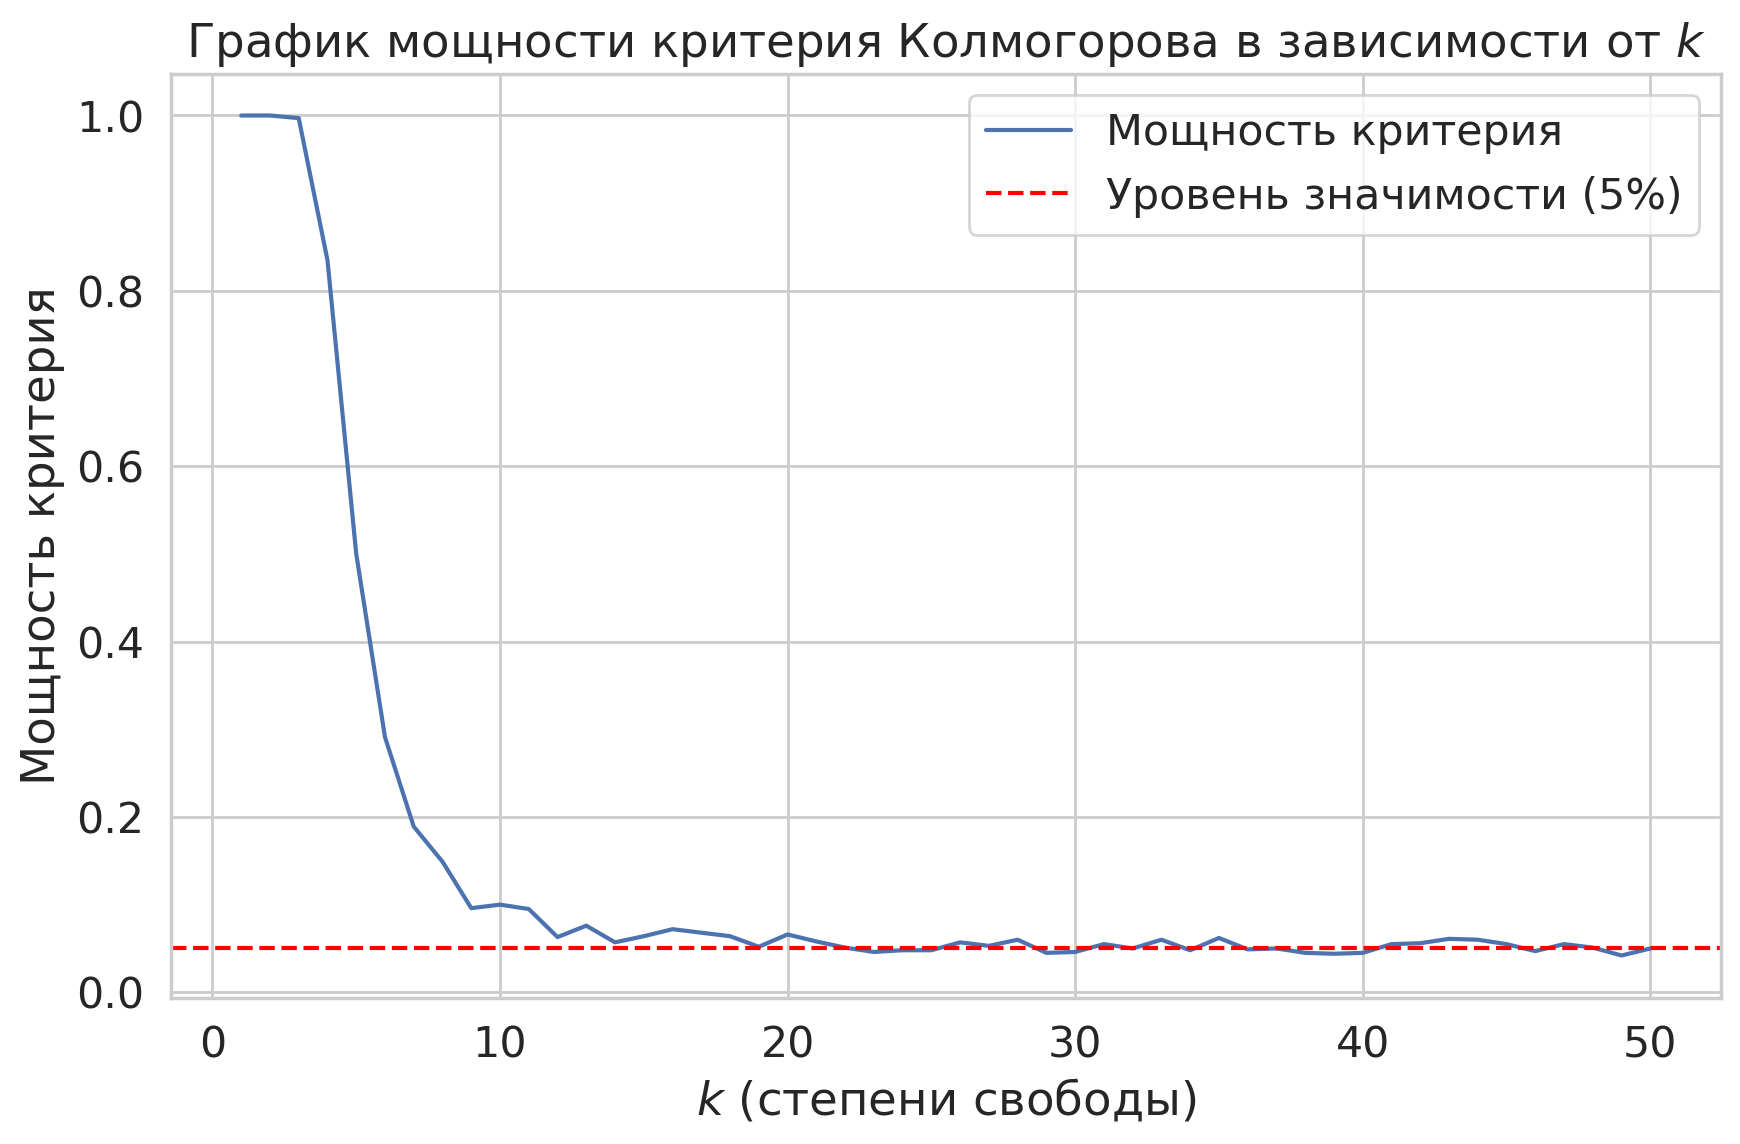

In [220]:
n = 1000
M = 1000
K = 50
k_values = np.arange(1, K + 1)

power = np.ndarray(K)

for k in k_values:
    reject_count = 0
    
    for _ in range(M):
        sample = sps.t.rvs(k, size=n)
        
        D_stat = kolmogorov_stat(sample, sps.norm.cdf)
        
        if D_stat > quant_kolm:
            reject_count += 1
    
    power[k - 1] = reject_count / M

plt.figure(figsize=(10, 6))
plt.plot(k_values, power, label='Мощность критерия')
plt.axhline(0.05, color='red', linestyle='--', label='Уровень значимости (5%)')
plt.xlabel('$k$ (степени свободы)')
plt.ylabel('Мощность критерия')
plt.title('График мощности критерия Колмогорова в зависимости от $k$')
plt.legend()
plt.show()

### Анализ мощности критерия Колмогорова
Наблюдается закономерное снижение мощности теста при увеличении числа степеней свободы $k$. С ростом $k$ распределение Стьюдента асимптотически приближается к нормальному, что делает их неразличимыми для критерия начиная примерно с $k = 15$. Это важно учитывать при анализе данных с «тяжелыми хвостами».

### Продвинутые критерии согласия

3. Проделайте действия из первой части задачи для [критерия Андерсона-Дарлинга](https://en.wikipedia.org/wiki/Anderson–Darling_test) и [Крамера-фон Мизеса-Смирнова](https://en.wikipedia.org/wiki/Cramér–von_Mises_criterion). Сравните их отвергающую способность с аналогичной у критерия Колмогорова.

**Критерий Крамера-фон Мизеса-Смирнова**  
Он основан на статистике:
$$W^2(X) = n\int\limits_{-\infty}^{+\infty}\left(F_n(x) - F(x)\right)^2dF(x) = \frac{1}{12n} + \sum\limits_{i=1}^n\left(\frac{2i - 1}{2n} - F(X_{(i)})\right)^2$$
Промоделируем эту статистику.

In [221]:
def cvm_stat(sample, cdf):
    n = len(sample)
    empirical_cdf = (np.arange(1, n + 1) - 0.5) / n
    sorted_sample = np.sort(sample)
    return 1 / (12 * n) + np.sum((empirical_cdf - cdf(sorted_sample))**2)

n = 1000
M = 10000

Wn_values = np.ndarray(M)

for i in range(M):
    sample = sps.uniform.rvs(size=n)

    Wn_values[i] = cvm_stat(sample, sps.uniform.cdf)

quant_cvm = np.quantile(Wn_values, 0.95)

quant_cvm

0.4679083973884906

**Критерий Андерсона-Дарлинга**  
Он основан на статистике
$$A^2 = n\int\limits_{-\infty}^{+\infty}\frac{\left(F_n(x) - F(x)\right)^2}{F(x)(1 - F(x)}dF(x) = -n - 2\sum\limits_{i=1}^n\left(\frac{2i - 1}{2n}\ln{F(X_{(i)})} + \left(1 - \frac{2i - 1}{2n}\right)\ln(1 - F(X_{(i)})\right)$$
Промоделируем эту статистику.

In [222]:
def ad_stat(sample, cdf):
    n = len(sample)
    empirical_cdf = (np.arange(1, n + 1) - 0.5) / n
    sorted_cdf = cdf(np.sort(sample))
    return -n - 2 * np.sum(empirical_cdf * np.log(sorted_cdf) + (1 - empirical_cdf) * np.log(1 - sorted_cdf))

n = 1000
M = 10000

An_values = np.ndarray(M)

for i in range(M):
    sample = sps.uniform.rvs(size=n)

    An_values[i] = ad_stat(sample, sps.uniform.cdf)

quant_ad = np.quantile(An_values, 0.95)

quant_ad

2.483196716747851

Теперь перейдём к валидации критериев. Проверим, что они сохраняют ошибку первого рода, как в пункте 2.3.

In [223]:
n = 100
M = 10000

rej_cvm = 0
rej_ad = 0

for _ in range(M):
    sample = sps.norm.rvs(size=n)

    W = cvm_stat(sample, sps.norm.cdf)
    A = ad_stat(sample, sps.norm.cdf)
    
    if W > quant_cvm:
        rej_cvm += 1

    if A > quant_ad:
        rej_ad += 1

print(f"Критерий Крамера-фон Мизеса:")
print(rej_cvm / M)

print(f"\nКритерий Андерсона-Дарлинга:")
print(rej_ad / M)

Критерий Крамера-фон Мизеса:
0.049

Критерий Андерсона-Дарлинга:
0.0517


В целом видим, что ошибка первого рода сохраняется примерно на нужном уровне.  
Перейдём к анализу мощности на альтернативе в виде распределения Стьюдента, как в пункте 2.4.

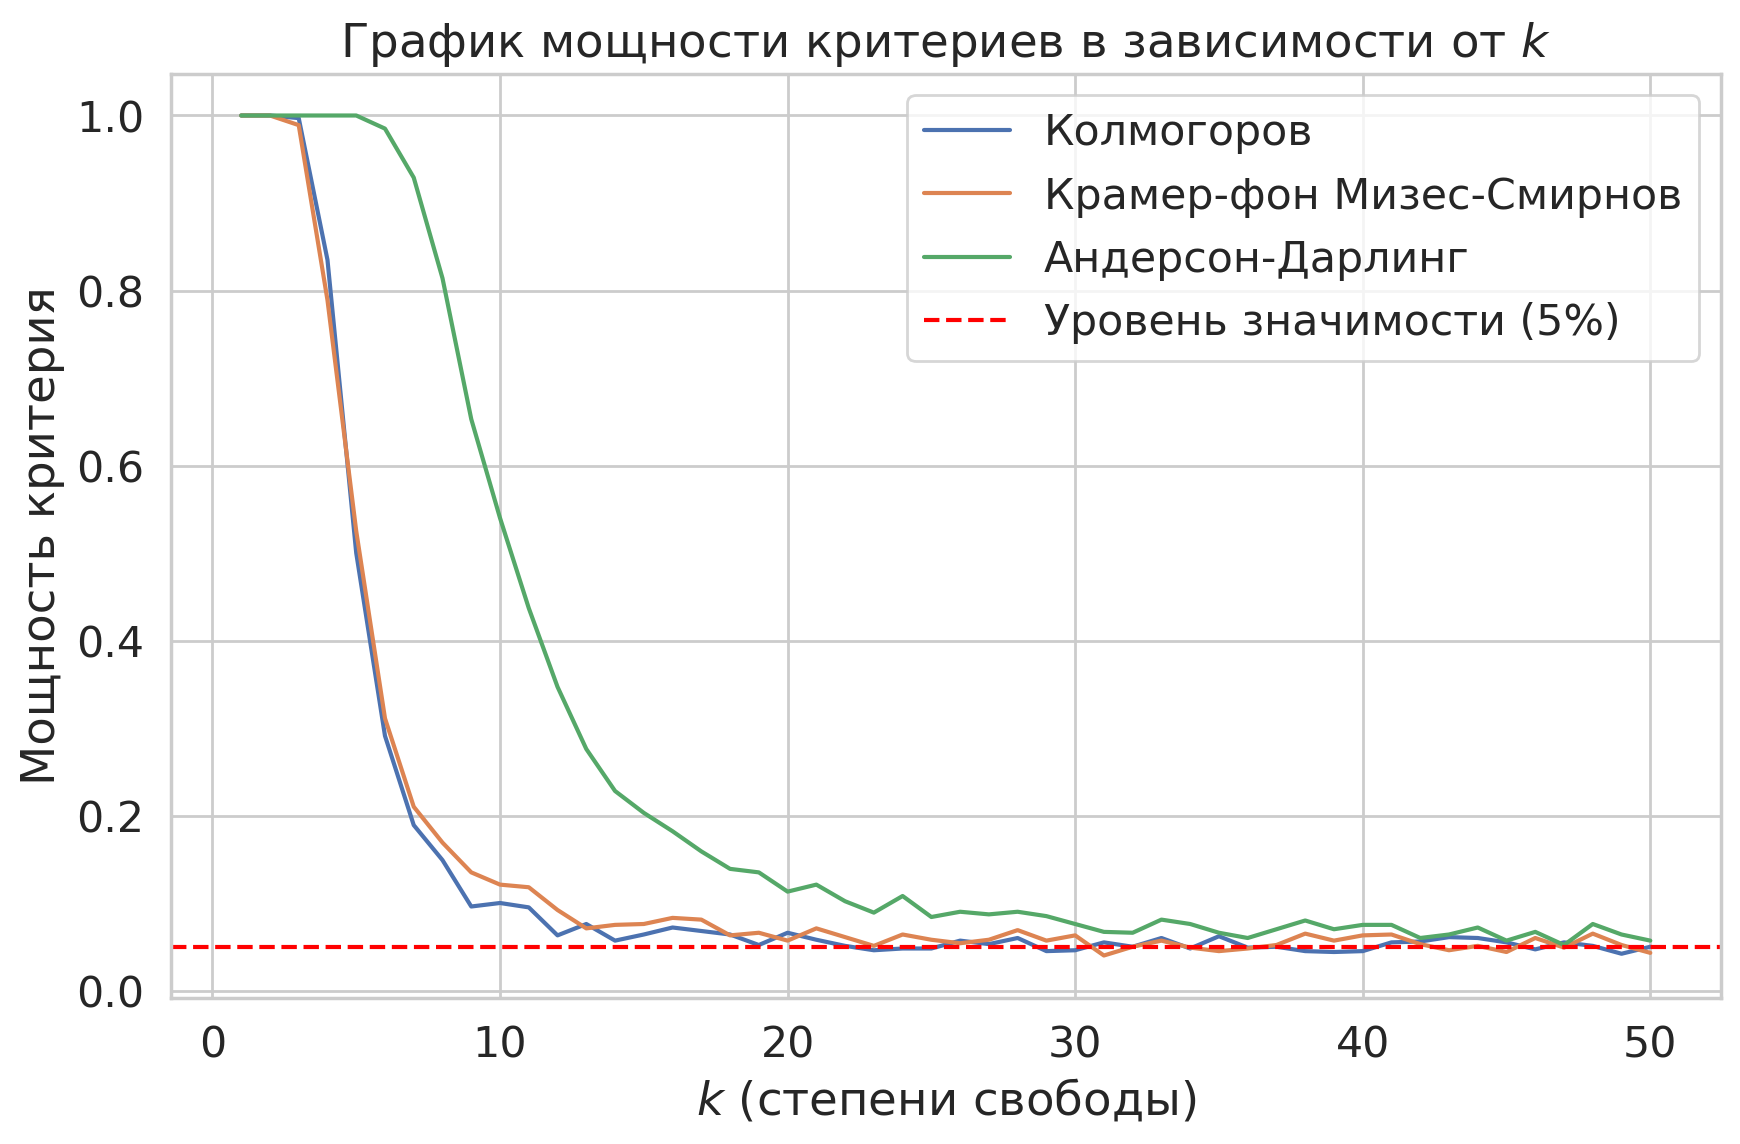

In [225]:
n = 1000
M = 1000
K = 50
k_values = np.arange(1, K + 1)

power_cvm = np.ndarray(K)
power_ad = np.ndarray(K)

for k in k_values:
    rej_cvm = 0
    rej_ad = 0
    
    for _ in range(M):
        sample = sps.t.rvs(k, size=n)
        
        W = cvm_stat(sample, sps.norm.cdf)
        A = ad_stat(sample, sps.norm.cdf)
        
        if W > quant_cvm:
            rej_cvm += 1
    
        if A > quant_ad:
            rej_ad += 1
    
    power_cvm[k - 1] = rej_cvm / M
    power_ad[k - 1] = rej_ad / M


plt.figure(figsize=(10, 6))
plt.plot(k_values, power, label='Колмогоров')
plt.plot(k_values, power_cvm, label='Крамер-фон Мизес-Смирнов')
plt.plot(k_values, power_ad, label='Андерсон-Дарлинг')
plt.axhline(0.05, color='red', linestyle='--', label='Уровень значимости (5%)')
plt.xlabel('$k$ (степени свободы)')
plt.ylabel('Мощность критерия')
plt.title('График мощности критериев в зависимости от $k$')
plt.legend()
plt.show()

### Сравнение чувствительности критериев
Критерий Крамера-фон Мизеса-Смирнова по мощности близок к критерию Колмогорова. Однако критерий Андерсона-Дарлинга демонстрирует значительно более высокую устойчивость и чувствительность, позволяя разделять распределения вплоть до $k = 40$.

### Критерий согласия Пирсона

4.1 Изучите критерий согласия Пирсона. В оригинальной постановке он работает для дискретных распределений. Предложите способ проверки при помощи него гипотез согласия для непрерывных распределений.

4.2 Постройте критерий согласия Пирсона для нормальных распределений. Опишите, какие квантили для распределения хи-квадрат Вам потребуются.

In [226]:
def pirson_stat(sample, intervals, l=10):
    n = np.size(sample)
    nu, _ = np.histogram(sample, bins=intervals)
    p = 1 / l
    return np.sum((nu - n * p)**2 / (n * p))

4.3. Промоделируйте статистику хи-квадрат, считая доступным только нормальное распределение (другие семплировать нельзя!).

Изначально, из предыдущего пункта я подумал, что нужно использовать квантили $\chi^2$ распределения, а не статистики. Непонятно, зачем тогда нам нужны квантили именно $\chi^2$. Ну ладно, смоделируем именно статистику хи-квадрат.  
Оформим именно в виде функции, потому что дальше потребуется вычислять квантили для разных $l$.

In [227]:
def get_quantile(l=10, alpha=0.95):    
    M = 100000
    n = 100

    intervals=np.array([sps.norm.ppf(i / l) for i in range(l + 1)])
    
    stat_chi2_values = np.ndarray(M)
    for i in range(M):
        sample = sps.norm.rvs(size=n)
        stat_chi2_values[i] = pirson_stat(sample, intervals, l)
    
    return np.quantile(stat_chi2_values, alpha)

l = 10
quant_chi2 = get_quantile(l)
quant_chi2

16.8

Выполните пункты, аналогичные 2.3 и 2.4. Постарайтесь так построить критерий согласия Пирсона, чтобы мощность для разных k была как можно больше.

In [228]:
n = 100
M = 10000
l = 10
intervals=np.array([sps.norm.ppf(i / l) for i in range(l + 1)])

rej_chi2 = 0

for _ in range(M):
    sample = sps.norm.rvs(size=n)

    chi2_hat = pirson_stat(sample, intervals)
    
    if chi2_hat > quant_chi2:
        rej_chi2 += 1

print(f"Критерий Пирсона:")
print(rej_chi2 / M)

Критерий Пирсона:
0.0499


**Результат:** Критерий Пирсона успешно проходит верификацию на ошибку I рода, сохраняя заданный уровень значимости.

Для проверки мощности попробуем перебрать несколько значений $l$.

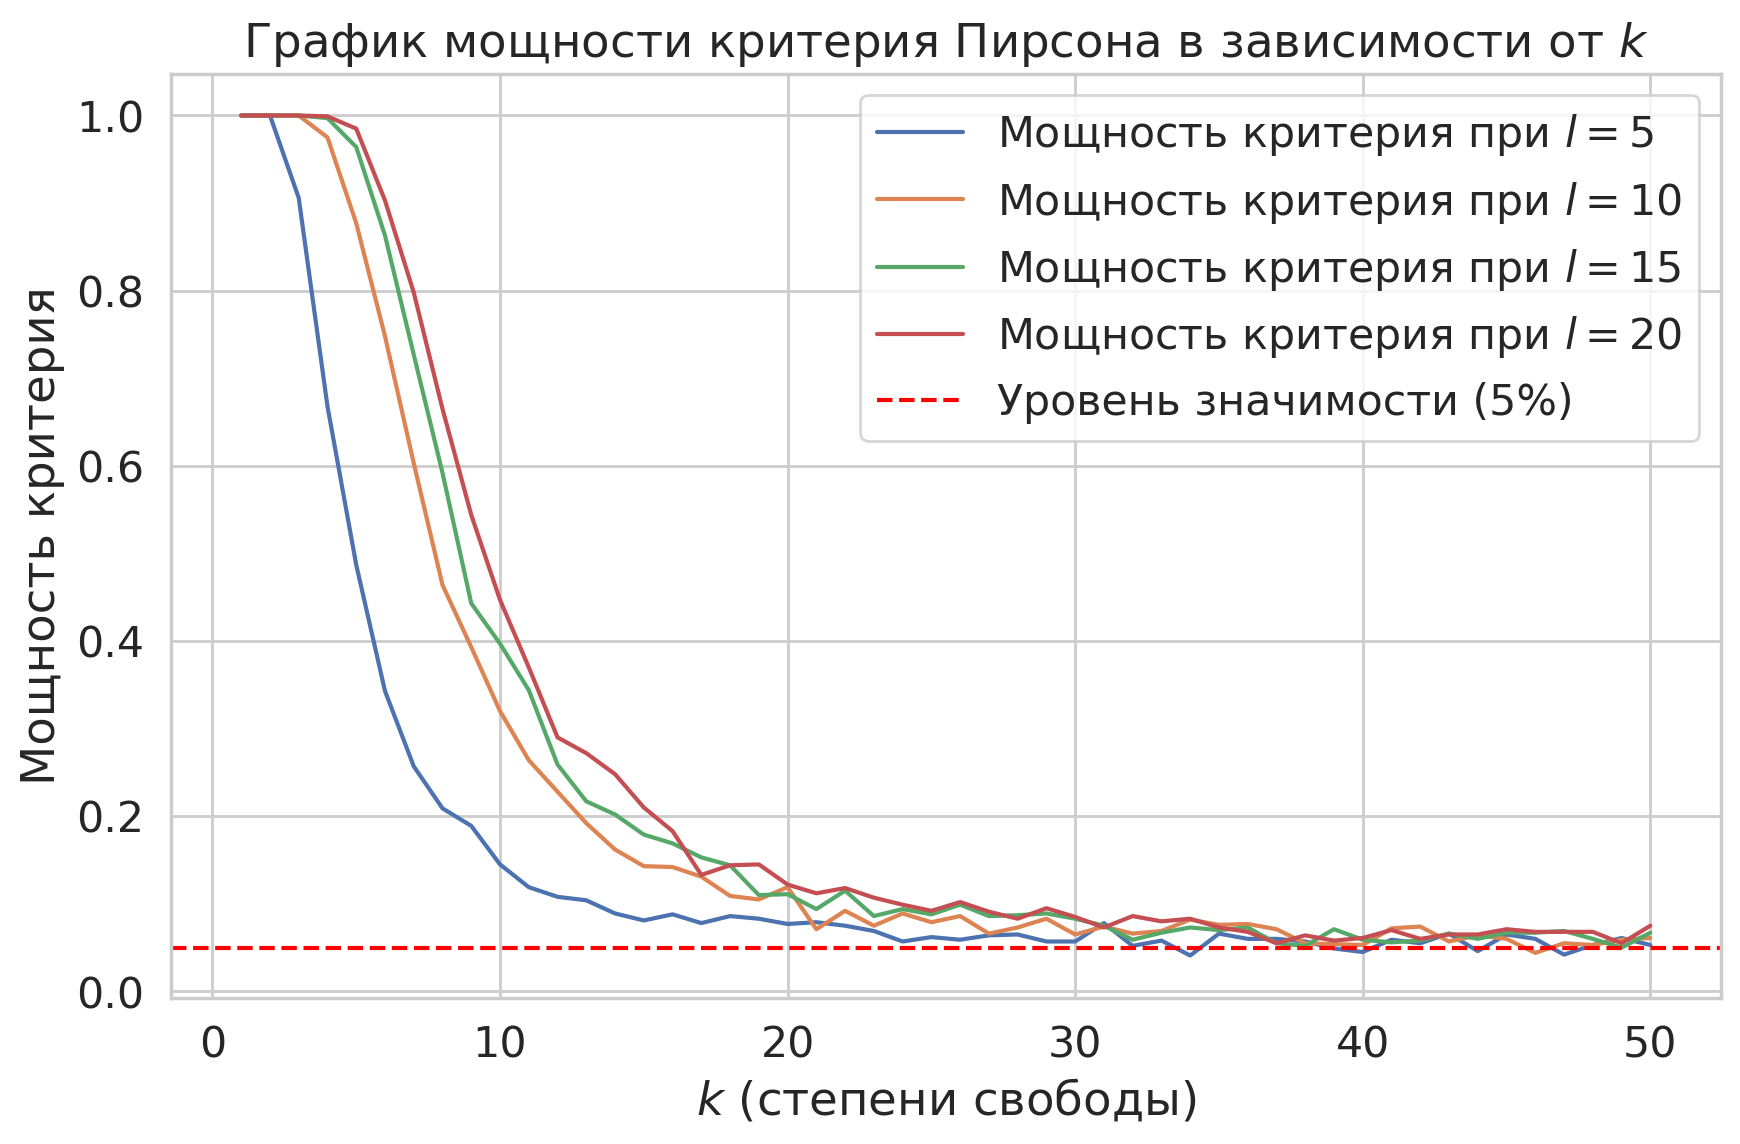

In [229]:
n = 1000
M = 1000
K = 50
k_values = np.arange(1, K + 1)

l_values = [5, 10, 15, 20]

plt.figure(figsize=(10, 6))
for l in l_values:
    power_chi2 = np.ndarray(K)
    intervals = np.array([sps.norm.ppf(i / l) for i in range(l + 1)])
    quant = get_quantile(l)
    
    for k in k_values:
        rej_chi2 = 0
        
        for _ in range(M):
            sample = sps.t.rvs(k, size=n)
            
            chi2_hat = pirson_stat(sample, intervals, l)
        
            if chi2_hat > quant:
                rej_chi2 += 1
        
        power_chi2[k - 1] = rej_chi2 / M

    plt.plot(k_values, power_chi2, label=rf'Мощность критерия при $l = {l}$')

plt.axhline(0.05, color='red', linestyle='--', label='Уровень значимости (5%)')
plt.xlabel('$k$ (степени свободы)')
plt.ylabel('Мощность критерия')
plt.title('График мощности критерия Пирсона в зависимости от $k$')
plt.legend()
plt.show()

**Интерпретация:** Увеличение числа интервалов разбиения ($l$) в критерии Пирсона положительно сказывается на его мощности. Даже при больших $k$ тест сохраняет способность улавливать минимальные отличия от нормальности.

### Стандартные способы проверки

5.1 Изучите критерий Шапиро-Уилка по [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro).

Что он проверяет? Будет ли он корректен для проверки распределения на равенство $\mathcal N(0, 1)$?

Проделайте пункты, аналогичные 2.3 и 2.4 для этого критерия.

In [35]:
n = 100
M = 10000

rej_shapiro = 0

for _ in range(M):
    sample = sps.norm.rvs(size=n)
    
    _, p_value = sps.shapiro(sample)
    
    if p_value < 0.05:
        rej_shapiro += 1

print(f"Критерий Шапиро-Уилка:")
print(rej_shapiro / M)

Критерий Шапиро-Уилка:
0.0475


**Примечание:** Критерий Шапиро-Уилка подтвердил свою эффективность в контроле уровня значимости для задачи проверки общей нормальности.

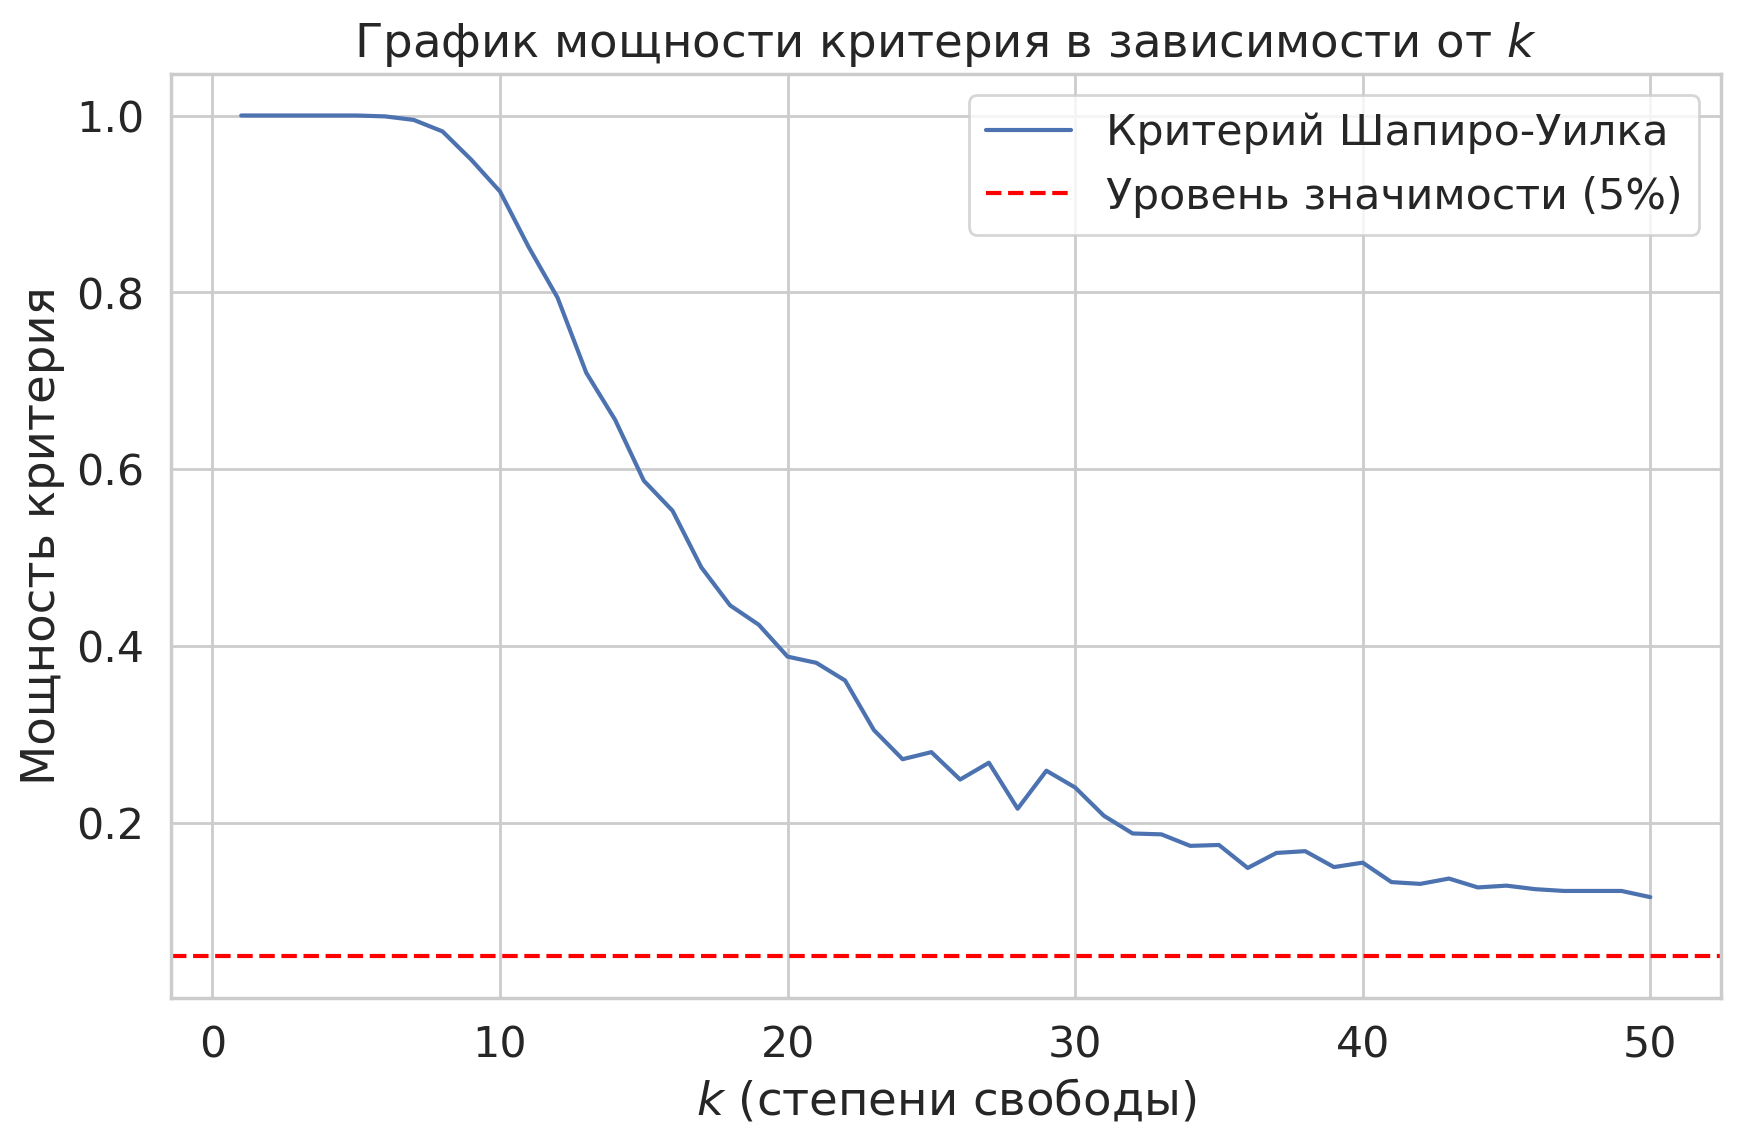

In [37]:
n = 1000
M = 1000
K = 50
k_values = np.arange(1, K + 1)

power_shapiro = np.ndarray(K)

for k in k_values:
    rej_shapiro = 0
    
    for _ in range(M):
        sample = sps.t.rvs(k, size=n)
        
        _, p_value = sps.shapiro(sample)
    
        if p_value < 0.05:
            rej_shapiro += 1
    
    power_shapiro[k - 1] = rej_shapiro / M

plt.figure(figsize=(10, 6))
plt.plot(k_values, power_shapiro, label='Критерий Шапиро-Уилка')
plt.axhline(0.05, color='red', linestyle='--', label='Уровень значимости (5%)')
plt.xlabel('$k$ (степени свободы)')
plt.ylabel('Мощность критерия')
plt.title('График мощности критерия в зависимости от $k$')
plt.legend()
plt.show()

**Анализ мощности Shapiro-Wilk:** Данный критерий показал наилучшие результаты среди всех рассмотренных методов. Он сохраняет высокую мощность даже при больших значениях $k$, что делает его «золотым стандартом» для предварительного анализа данных в продуктовых кейсах.

## Итоговое резюме по методологии тестирования

В ходе исследования были сделаны следующие ключевые выводы:

1. **Иерархия мощности:** Критерий Шапиро-Уилка является наиболее мощным инструментом для выявления отклонений от нормальности. Вторым по эффективности следует критерий Андерсона-Дарлинга.
2. **Ограничения Колмогорова:** Стандартный критерий Колмогорова обладает умеренной мощностью и может «пропускать» отличия в данных с умеренно тяжелыми хвостами ($k > 15$).
3. **Практические рекомендации:** Для надежного анализа рекомендуется использовать каскадный подход: сначала проверка общей нормальности (Шапиро-Уилк), а затем верификация конкретных параметров распределения с помощью специализированных критериев согласия.
4. **Роль объема данных:** Все рассмотренные критерии асимптотически корректны, однако их реальная полезность в продуктовых задачах напрямую зависит от понимания физического смысла альтернатив (например, наличие аномалий в хвостах распределения).

## Задача 2. Хи-хи-хи-хи-хи квадрат

### Часть 1. Одномерный хи-квадрат

Британские учёные провели ряд экспериментов по выяснению склонности людей к неравнозначному выбору стратегии в камень-ножницы-бумага. По результатам 119 экспериментальных матчей было обнаружено, что 66 человек выбирали первым камень, 39 бумагу и 14 ножницы. Используя критерий хи-квадрат выясните, существует ли статистически достоверная выигрышная стратегия выбора первого хода.

Пользоваться критерием хи-квадрат из коробки запрещено. Распределение моделировать самому (или взять квантили из прошлой задачи).

Эта задача будет оцениваться не сколько за вычисления, сколько за правильный подход к формулировке условий, методов и вывода.

1. Сформулируйте статистическую гипотезу, которую будете проверять.

При равновероятном выборе хода вероятность выигрыша равна $\frac{1}{3}$. Судя по результатам экспериментальных матчей, мы хотим предположить, что если играть бумагу, то вероятность будет больше. Построим модель и сформулируем гипотезу.  
Модель: $X_i$ - ход, то есть формально случайный элемент множества $\{\text{камень, ножницы, бумага}\}$. Нам конкретные значения не так важны, скорее, важно распределение вероятностей. Соответственно, гипотеза состоит в том, что распределение равномерное, и если она не отвергается, то нельзя сказать, что есть какие-то предпочтения для выбора хода. Если же она отвергается, то это уже статистически значимый результат.

2. Выберите уровень значимости и объясните выбор.

Возьмём стандартный уровень значимости $\alpha = 0.05$. Почему так? Нам не так страшно ошибиться при истинности гипотезы, чтобы брать его меньше, но и контролировать мощность тоже хотим.  

3. Провалидируйте ваш критерий: с помощью многократного сэмплирования данных, подчиняющихся нулевой гипотезе (обычно берут порядка 100000 повторений, но можете взять чуть меньше, если мощности не позволяют), оцените распределение pvalue, постройте доверительный интервал для ошибки I рода вашего критерия и сделайте вывод о его пригодности.

Имеет ли смысл проверять распределение pvalue на равномерность с помощью, например, критерия Колмогорова? Если да, то проделайте это и сделайте выводы, если нет --- поясните, почему.

Для поиска pvalue при истинности гипотезы нам понадобится функция распределения статистики $\hat\chi^2$, которая используется в критерии, однако её у нас нет, проблема. Её можно решить разными способами.  
1) Смоделировать статистику, как мы это делали в первом задании, и взять в качестве ф.р. для расчёта pvalue её эмпирическую ф.р.
2) У нас есть сходимость этой статистики к $\chi^2_2$ с ростом размера выборки, а в нашем случае $n = 119$. Как известно с семинаров по статистике, при $n \geqslant 50$ статистика уже хорошо похожа на предельное распределение, поэтому вместо сэмплирования настоящего распределения можно смоделировать выборку из $\chi^2_2$ и взять её э.ф.р.

Если бы можно было использовать $\chi^2$ из коробки, то второй способ был бы лучше, так как приближение и так хорошее, а функция распределения достаточно точная. Однако распределение брать нельзя, поэтому в любом случае нужно приближать эмпирически, а тогда как будто первый вариант получше: мы теряем точность только на сходимости э.ф.р. к истинной ф.р., а во втором случае дополнительно из-за сходимости статистики.  
Посмотрим на обе:

In [38]:
from statsmodels.distributions.empirical_distribution import ECDF

n = 119
M = 1000000

p = np.array([1 / 3, 1 / 3, 1 / 3])
expected = n * p

samples = sps.multinomial.rvs(n, p, size=M)

def stat_value(nu):
    return np.sum((nu - expected)**2 / expected, axis=-1)

stat_sample = stat_value(samples)

stat_ecdf = ECDF(stat_sample)

In [39]:
norms = sps.norm.rvs(size=(M, 2))
chi2s = np.sum(norms**2, axis=1)

chi2_ecdf = ECDF(chi2s)

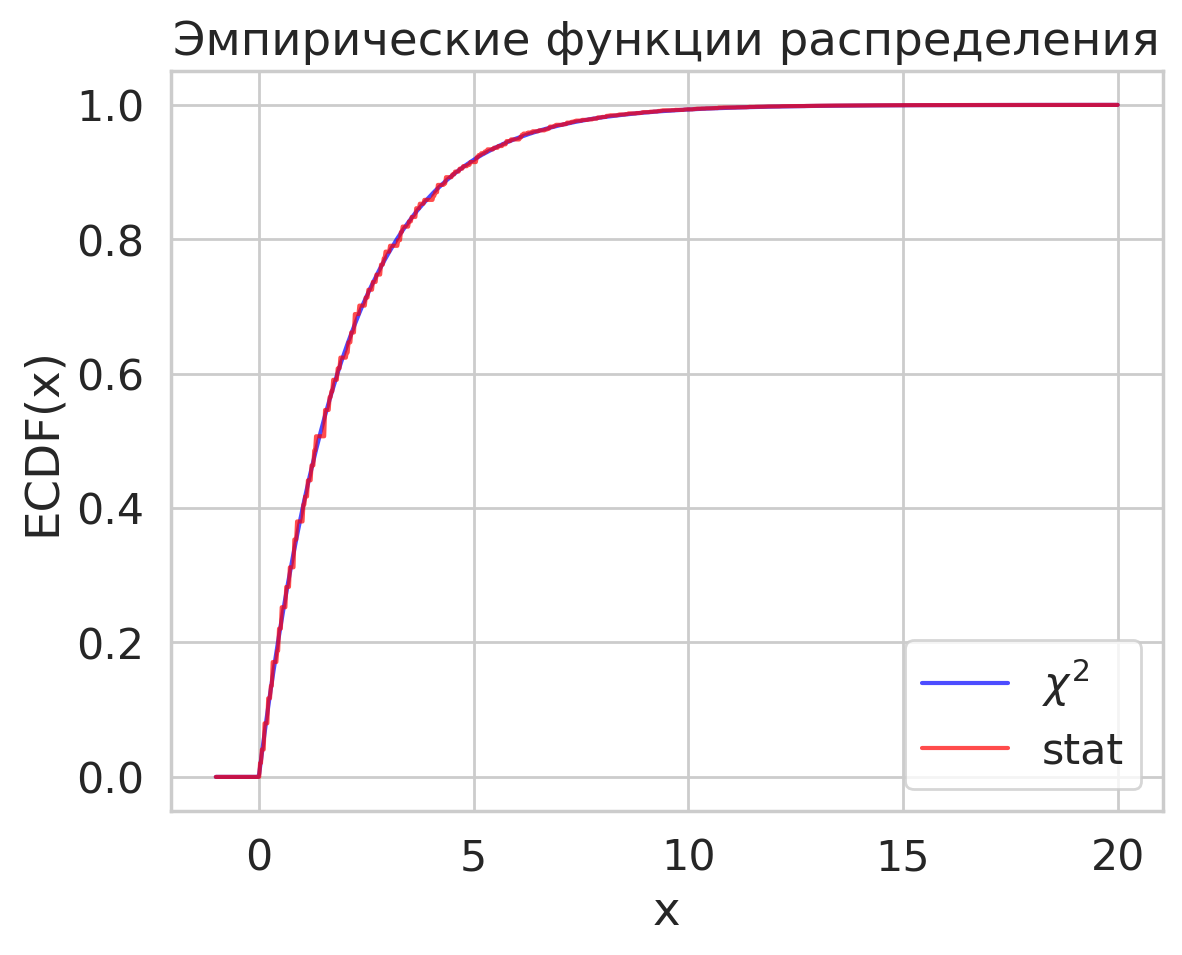

In [40]:
x = np.linspace(-1, 20, 1000)

plt.plot(x, chi2_ecdf(x), label=r'$\chi^2$', color='blue', alpha=0.7)

plt.plot(x, stat_ecdf(x), label='stat', color='red', alpha=0.7)

plt.title('Эмпирические функции распределения')
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.legend()

plt.show()

Почти совпадают, поэтому, скорее всего, неважно что использовать. Буду использовать `chi2_ecdf`.

Теперь перейдём к заданию. Доверительный интервал построим как на семинаре.

Доля ошибки первого рода равна 0.05105


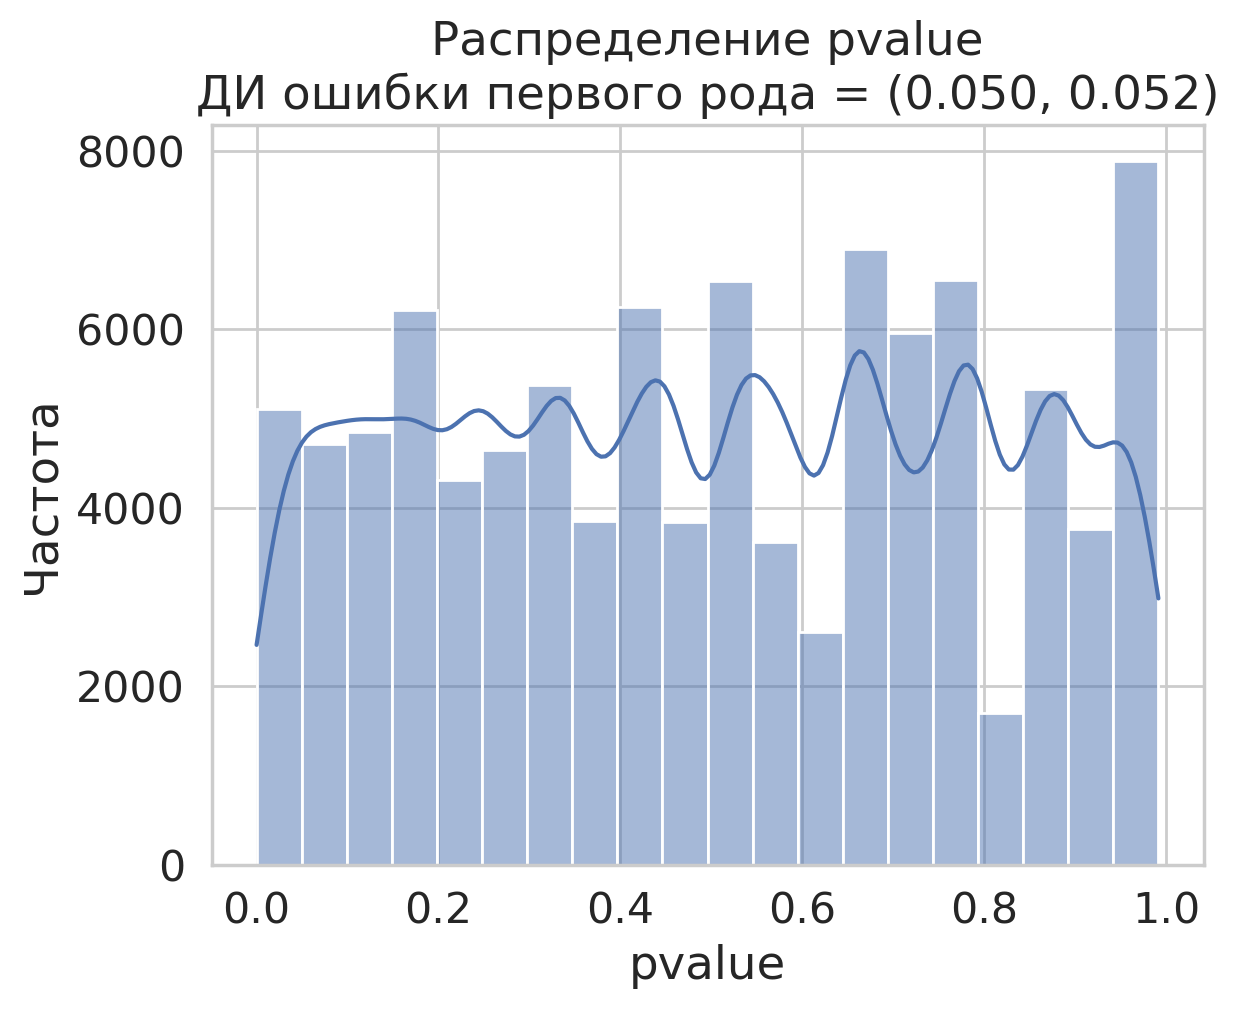

In [41]:
from statsmodels.stats.proportion import proportion_confint

M = 100000
n = 119

samples = sps.multinomial.rvs(n, p, size=M)
stats = stat_value(samples)
pvalues = 1 - chi2_ecdf(stats)

confint = proportion_confint((pvalues < 0.05).sum(), M)

print(f"Доля ошибки первого рода равна {np.sum(pvalues < 0.05) / M}")

plt.plot(figsize=(8, 6))
sns.histplot(pvalues, bins=20, kde=True)
plt.xlabel("pvalue")
plt.ylabel("Частота")
plt.title(f"Распределение pvalue\nДИ ошибки первого рода = ({confint[0]:0.3f}, {confint[1]:0.3f})")
plt.show()

Как видим, ошибка первого рода сохраняется на нужном уровне, но распределение pvalue не похоже на равномерное, видны сильные колебания. Что вполне ожидаемо, поскольку мы вместо настоящей функции распределения взяли эмпирическую, а она хоть и сходится к настоящей, но не равна ей.

4. Примените критерий к нашим данным.

In [44]:
sample = [66, 39, 14]
stat = stat_value(sample)
pvalue = 1 - chi2_ecdf(stat)

print(f"Статистика Пирсона: {stat}")
print(f"P-value: {pvalue}")

if pvalue < 0.05:
    print("Гипотеза о равномерном распределении отвергается.")
else:
    print("Гипотеза о равномерном распределении не отвергается.")

Статистика Пирсона: 34.10084033613445
P-value: 0.0
Гипотеза о равномерном распределении отвергается.


5. Дайте ответ на поставленный вопрос, чётко дав пояснение как надо играть и почему Вашему анализу можно верить. Используйте понятия "p-value", "гипотеза", "уровень значимости", "отвергать/принимать."

Вообще, всё что мы поняли, что выбор хода действительно не может быть равномерно распределённым (вернее, с высокой вероятностью он не является таковым), однако это ещё нам не помогает сделать ход, который выигрывает чаще. Дальше можно что-то ещё проверять, например, что вероятности упорядочены не так, как мы предполагаем, то есть не $p_1 > p_2 > p_3$, а как-то по-другому, тогда если гипотеза отвергнется, то снова получим какую-то информацию. Если в конечном итоге придём к тому, что всё-таки вероятности должны быть упорядочены именно так, то лучше выбирать, конечно, бумагу. Но делать это сейчас не будем, а просто взглянем на данные.   
**Ответ**  
Наш анализ показал, что гипотеза о равномерном распределении выбора хода отвергается, поскольку pvalue оказалось сильно меньше заданного уровня значимости $0.05$ (даже очень близко к 0). Глядя на данные, можно сделать вывод, что чаще всего выбирается камень, а реже всего - ножницы, откуда следует, что выигрышной стратегией является играть бумагу (если соперник не знает нашу стратегию), так как вероятность нашей победы в таком случае максимальная.

### Часть 2. Двумерный критерий хи-квадрат.

Критерий хи-квадрат на практике даёт простой и тем не менее самый популярный способ проверки категориальных данных на наличие зависимостей. Например, чтобы проверить, зависит ли время решения практики по статистике (в часах) от выпитого алкогольного напитка напрямую перед началом работы, поступают так: делают таблицу, где по одной размерности откладывают часы (от 1 до 5, скажем), а по другой --- напитки (пиво, вино, водка, вода,....) и в ячейку ставят число наблюдений (студентов), выпивших заданный напиток и сделавших прак за заданное число часов (ровно). И далее применяют хи-квадрат критерий (см. ниже).

Изучите пример применения обобщённого критерия хи-квадрат для проверки независимости категориальных выборок по [Википедии](https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data) или семинарскому ноутбуку.

Данные:

In [45]:
group1 = {"1": (0.4, -1, -1),
"2": (0.8, 9, 4),
"3": (-1, -1, -1),
"4": (1.6, 4, 5),
"5": (0.4, 5, 4),
"6": (1.8, -1, -1),
"7": (2.4, 3, 4),
"8": (3.0, 4, 7),
"9": (5.4, -1, -1),
"10": (2.2, 8, 3),
"11": (1.2, 8, 4),
"12": (0, -1, -1),
"13": (2.6, 9, 9),
"14": (0.4, 10, 4),
"15": (1.6, 10, 1),
"16": (1.2, 4, 5),
"17": (2.2, 8, 8)}

group2 = {"1": (0.8, 8, 7),
"2": (3.2, 4, 7),
"3": (2.6, 8, 5),
"4": (2.2, 10, 10),
"5": (0.4, 9, 9),
"6": (1.2, 4, 7),
"7": (1.2, 6, 7),
"8": (-1, -1, -1),
"9": (2.4, -1, -1),
"10": (1.8, 4, 9),
"11": (2.6, 8, 3),
"12": (1.8, 6, -1),
"13": (1.4, 6, 3),
"14": (-1, 3, -1),
"15": (1.2, 1, 1),
"16": (5, 4, 1)}


Сформулируйте гипотезу для критерия хи-квадрат и постройте табличную выборку.

Сконвертируем в DataFrame.

In [46]:
def convert_to_dataframe(group):
    df = pd.DataFrame.from_dict(group, orient='index', columns=["score", "before", "after"])
    df = df.replace(-1, np.nan)
    return df

df_group1 = convert_to_dataframe(group1)
df_group2 = convert_to_dataframe(group2)

df_group1["group"] = "Group1"
df_group2["group"] = "Group2"

df_all = pd.concat([df_group1, df_group2], ignore_index=True)
df_all.head()

score  before  after   group
0    0.4     NaN    NaN  Group1
1    0.8     9.0    4.0  Group1
2    NaN     NaN    NaN  Group1
3    1.6     4.0    5.0  Group1
4    0.4     5.0    4.0  Group1

**1.** Построим таблицу сопряжённости между `score_category` и `group`

In [47]:
df_all['score_category'] = df_all['score'].dropna().round()

score_group_table = pd.crosstab(df_all['score_category'], df_all['group'])
score_group_table

group           Group1  Group2
score_category                
0.0                  4       1
1.0                  3       5
2.0                  6       4
3.0                  2       3
5.0                  1       1

In [48]:
df_all.head()

score  before  after   group  score_category
0    0.4     NaN    NaN  Group1             0.0
1    0.8     9.0    4.0  Group1             1.0
2    NaN     NaN    NaN  Group1             NaN
3    1.6     4.0    5.0  Group1             2.0
4    0.4     5.0    4.0  Group1             0.0

**2.** Построим таблицу сопряжённости между мнениями до и после.

In [49]:
opinion_change_table = pd.crosstab(df_all['before'], df_all['after'])
opinion_change_table

after   1.0   3.0   4.0   5.0   7.0   8.0   9.0   10.0
before                                                
1.0        1     0     0     0     0     0     0     0
3.0        0     0     1     0     0     0     0     0
4.0        1     0     0     2     3     0     1     0
5.0        0     0     1     0     0     0     0     0
6.0        0     1     0     0     1     0     0     0
8.0        0     2     1     1     1     1     0     0
9.0        0     0     1     0     0     0     2     0
10.0       1     0     1     0     0     0     0     1

**3.** И для мнения после с оценкой за контрольную.

In [50]:
opinion_score_table = pd.crosstab(df_all['after'], df_all['score_category'])
opinion_score_table

score_category  0.0  1.0  2.0  3.0  5.0
after                                  
1.0               0    1    1    0    1
3.0               0    1    1    1    0
4.0               2    2    1    0    0
5.0               0    1    1    1    0
7.0               0    3    0    2    0
8.0               0    0    1    0    0
9.0               1    0    1    1    0
10.0              0    0    1    0    0

Как видим, в этих таблицах много нулей, что не очень хорошо для критерия. Давайте сгруппируем мнения для всех дальнейших вычислений:

In [51]:
def group_opinion(opinion):
    if pd.isna(opinion):
        return np.nan
    elif 1 <= opinion <= 3:
        return "Плохо"
    elif 4 <= opinion <= 5:
        return "Норм"
    elif 6 <= opinion <= 7:
        return "Хорошо"
    elif 8 <= opinion <= 10:
        return "Прекрасно"
    return np.nan

df_all["before_upd"] = df_all["before"].apply(group_opinion)
df_all["after_upd"] = df_all["after"].apply(group_opinion)

opinion_change_table_upd = pd.crosstab(df_all["before_upd"], df_all["after_upd"])
opinion_score_table_upd = pd.crosstab(df_all["score_category"], df_all["after_upd"])

desired_order = ["Плохо", "Норм", "Хорошо", "Прекрасно"]
opinion_change_table_upd = opinion_change_table_upd.reindex(columns=desired_order)
opinion_score_table_upd = opinion_score_table_upd.reindex(columns=desired_order)

In [52]:
opinion_change_table_upd

after_upd   Плохо  Норм  Хорошо  Прекрасно
before_upd                                
Норм            1     3       3          1
Плохо           1     1       0          0
Прекрасно       3     4       1          4
Хорошо          1     0       1          0

In [53]:
opinion_score_table_upd

after_upd       Плохо  Норм  Хорошо  Прекрасно
score_category                                
0.0                 0     2       0          1
1.0                 2     3       3          0
2.0                 2     2       0          3
3.0                 1     1       2          1
5.0                 1     0       0          0

**4.** Построим таблицу с оценками и разностью мнений. Опять же, сразу для удобства сгруппируем разности мнений.

In [54]:
def group_difference(diff):
    if diff <= -4:
        return "Сильно хуже"
    elif -3 <= diff <= -1:
        return "Хуже"
    elif diff == 0:
        return "Не изменилось"
    elif diff >= 1:
        return "Лучше"
    return np.nan

df_all["opinion_diff"] = df_all["after"] - df_all["before"]

df_all["opinion_difference"] = df_all["opinion_diff"].apply(group_difference)

opinion_difference = pd.crosstab(df_all["score_category"], df_all["opinion_difference"])

desired_order = ["Сильно хуже", "Хуже", "Не изменилось", "Лучше"]
opinion_difference = opinion_difference.reindex(columns=desired_order)

opinion_difference

opinion_difference  Сильно хуже  Хуже  Не изменилось  Лучше
score_category                                             
0.0                           1     1              1      0
1.0                           2     2              1      3
2.0                           2     0              2      3
3.0                           1     1              1      2
5.0                           0     1              0      0

Посчитайте необходимые статистики и сделайте вывод, какая группа справилась лучше с контрольной работой и значимы ли изменения. Напишите вывод с использованием терминов из темы "проверка гипотез".

In [55]:
def chi2_stat(contingency_table):
    table = contingency_table.values
    row_totals = table.sum(axis=1)
    column_totals = table.sum(axis=0)
    grand_total = table.sum()

    expected = np.outer(row_totals, column_totals) / grand_total
    chi2 = ((table - expected) ** 2 / expected).sum()

    return chi2

score_group_stat = chi2_stat(score_group_table)
opinion_change_stat = chi2_stat(opinion_change_table_upd)
opinion_score_stat = chi2_stat(opinion_score_table_upd)
opinion_difference_stat = chi2_stat(opinion_difference)

print(score_group_stat, opinion_change_stat, opinion_score_stat, opinion_difference_stat, sep='\n')

2.779017857142857
7.575000000000001
12.746428571428574
7.7140476190476175


Осталось посчитать нужные квантили $\chi^2$. Вернее, $0.95$-квантиль для
1) $\chi^2_4$
2) $\chi^2_9$
3) $\chi^2_{12}$
4) $\chi^2_{12}$

In [56]:
def get_quantile_chi2(dof=1, alpha=0.95):    
    M = 100000
    
    chi2_values = np.ndarray(M)
    
    for i in range(M):
        sample = sps.norm.rvs(size=dof)
        chi2_values[i] = np.sum(sample**2)
    
    return np.quantile(chi2_values, alpha)

quant4 = get_quantile_chi2(4)
quant9 = get_quantile_chi2(9)
quant12 = get_quantile_chi2(12)

print(quant4, quant9, quant12)

9.434413253126158 16.878797082119576 21.062783683012483


Как видим, все гипотезы не отвергаются, что говорит о недостаточности доказательств в пользу того, что рассмотренные пары признаков действительно независимы. Откуда получаем ответы на наши вопросы:

**1.**  
Группы справились примерно одинаково. По крайней мере, наш критерий не смог доказать то, что оценка сильно зависит от того, из какой группы студент. Посмотрим ещё на гистограммы, чтобы увидеть, что распределения действительно похожи.

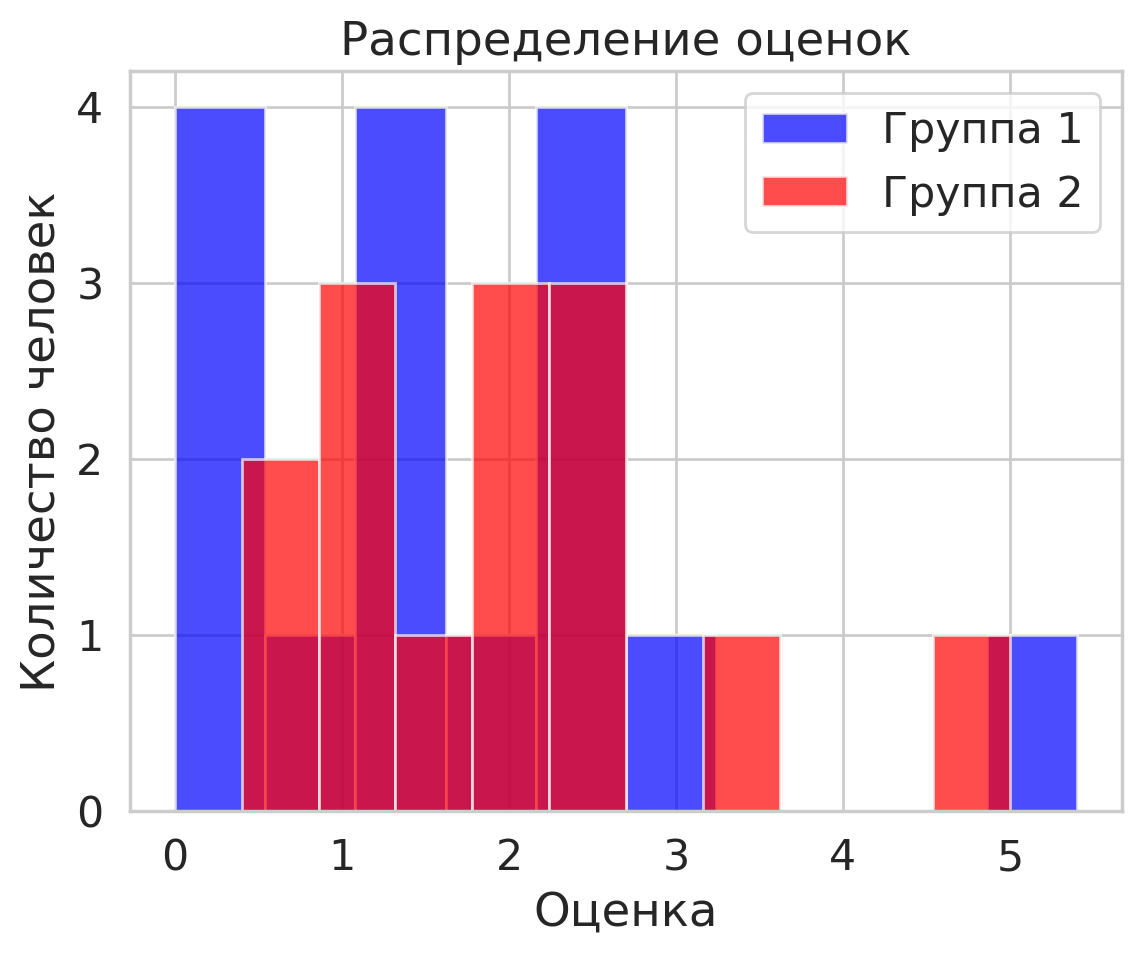

In [57]:
plt.plot(figsize=(8, 6))
plt.hist(df_group1['score'], color='blue', alpha=0.7, label='Группа 1')
plt.hist(df_group2['score'], color='red', alpha=0.7, label='Группа 2')
plt.ylabel('Количество человек')
plt.xlabel('Оценка')
plt.title('Распределение оценок')
plt.legend()
plt.show()

## Задача 3. Корреляция

1. Для данных из прошлой задачи о контрольных изучите зависимость между мнением студента о контрольной до/после неё и оценкой.

Соберите их в любой удобный вид и визуализируйте.

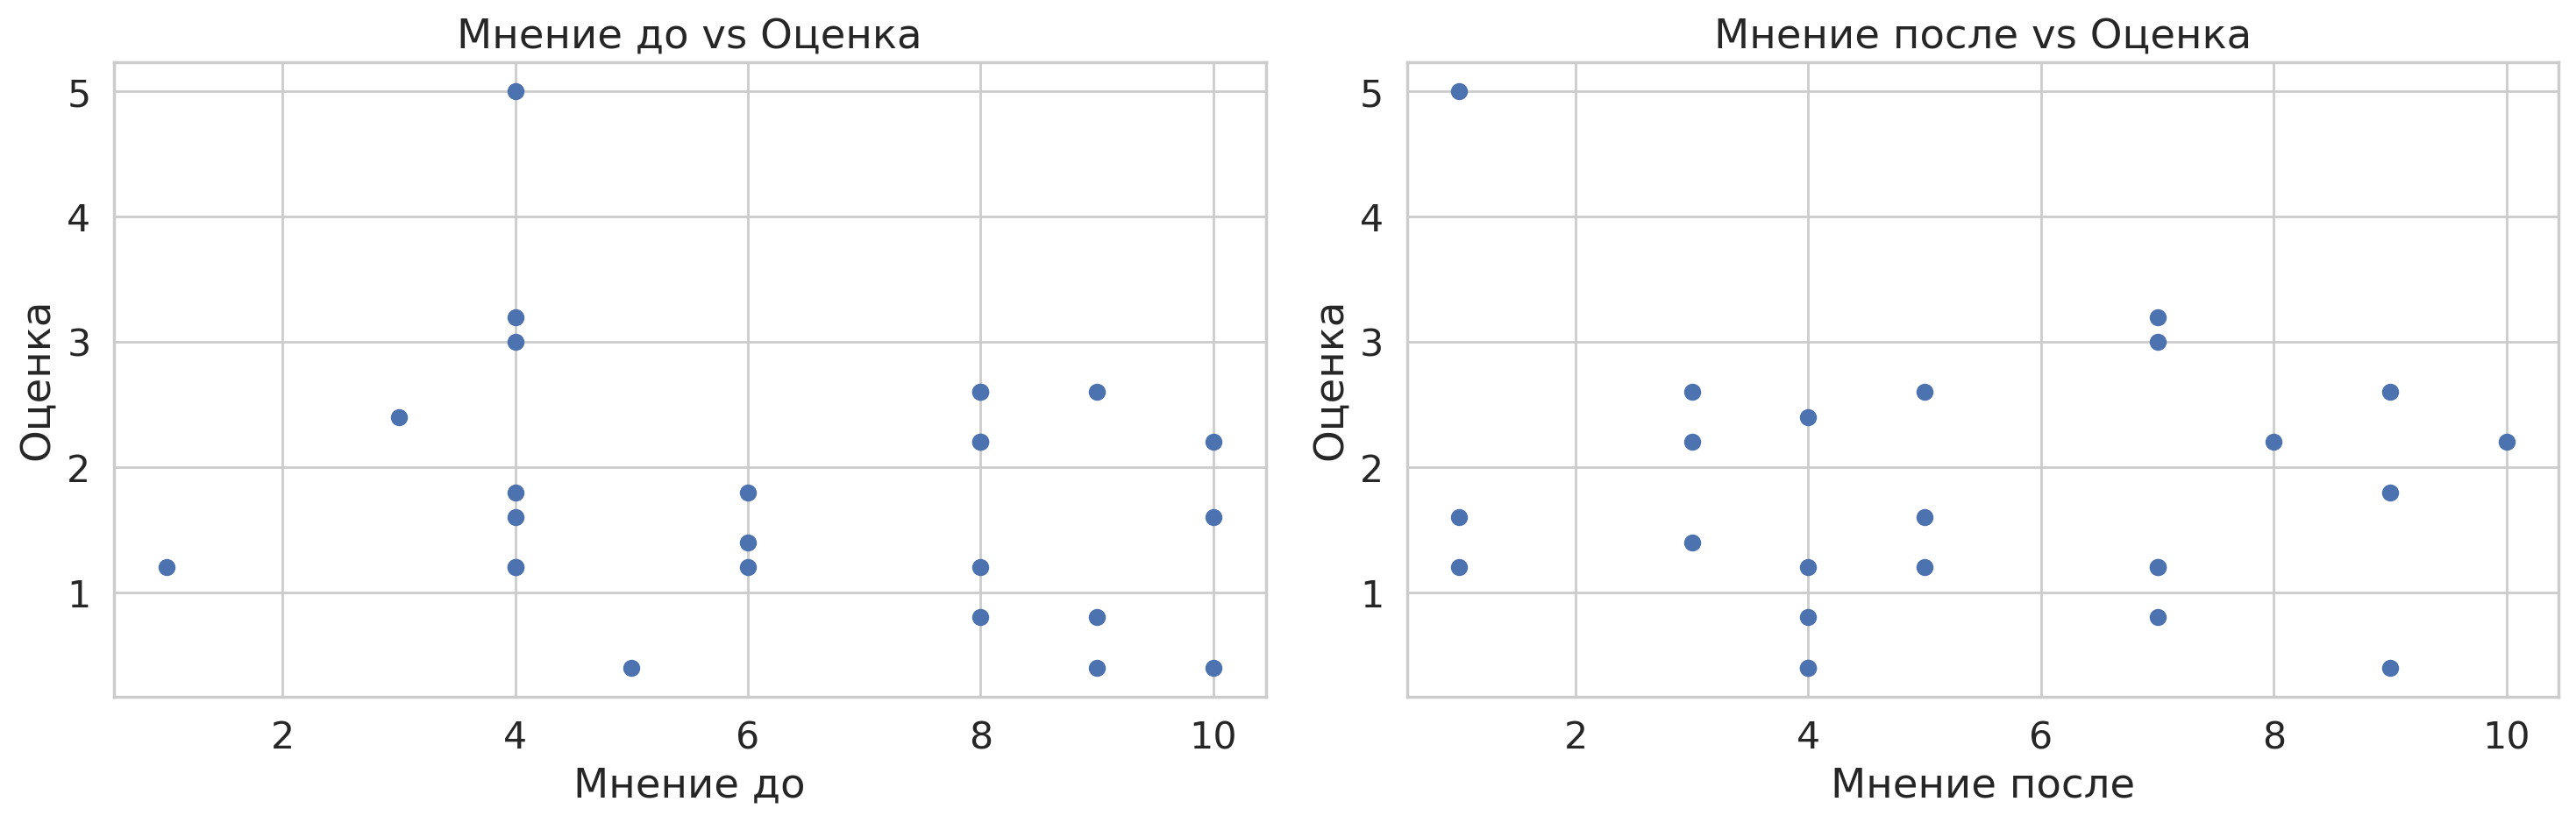

In [58]:
data = df_all[['score', 'before', 'after']]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(data["before"], data["score"])
plt.title("Мнение до vs Оценка")
plt.xlabel("Мнение до")
plt.ylabel("Оценка")

plt.subplot(1, 2, 2)
plt.scatter(data["after"], data["score"])
plt.title("Мнение после vs Оценка")
plt.xlabel("Мнение после")
plt.ylabel("Оценка")

plt.tight_layout()
plt.show()

Визуально нет якровыраженной зависимости между указанными парами признаков.

Посчитайте коэффициенты корреляции Пирсона и Спирмена. Отличаются ли они? Почему?

Коэффициент Пирсона вычисляется так:
$$\hat\rho = \frac{\sum\limits_{i=1}^n\left(X_i - \overline X\right)\left(Y_i - \overline Y\right)}{\sqrt{\sum\limits_{i=1}^n\left(X_i - \overline X\right)^2\left(Y_i - \overline Y\right)^2}}$$
Коэффициент Спирмена вычисляется примерно так же, но по рангам, а имеено
$$\hat\rho_s = \frac{\sum\limits_{i=1}^n\left(R_i - \overline R\right)\left(S_i - \overline S\right)}{\sqrt{\sum\limits_{i=1}^n\left(R_i - \overline R\right)^2\left(S_i - \overline S\right)^2}} = 1 - \frac{6}{n^3 - n}\sum\limits_{i=1}^n\left(R_i - S_i\right)^2$$
Напишем соответсвующие функции:

In [59]:
def pearson_coef(x, y):
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = np.array(x)[valid_indices]
    y = np.array(y)[valid_indices]
    n = len(x)
    
    rho_hat, _ = sps.pearsonr(x, y)
    return n, rho_hat

def spearman_coef(x, y):
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = np.array(x)[valid_indices]
    y = np.array(y)[valid_indices]
    n = len(x)

    rho_s_hat, _ = sps.spearmanr(x, y)
    return n, rho_s_hat

coefs = np.empty((2, 2)) # Индексация пар: по строкам 0 - (before, score), 2 - (after, score)
                         # по столбцам: 0 - Пирсон, 1 - Спирмен
N = np.empty((2, 2))
columns = ['before', 'after']

for i in range(2):
    N[i][0], coefs[i][0] = pearson_coef(data[columns[i]], data['score'])
    N[i][1], coefs[i][1] = spearman_coef(data[columns[i]], data['score'])
    print(f"Для пары ({columns[i]}, score):")
    print(f"Коэффициент Пирсона:  {coefs[i][0]}")
    print(f"Коэффициент Спирмена: {coefs[i][1]}")

Для пары (before, score):
Коэффициент Пирсона:  -0.22019976869295405
Коэффициент Спирмена: -0.21594204525028685
Для пары (after, score):
Коэффициент Пирсона:  -0.0880233556983005
Коэффициент Спирмена: 0.01818203450713252


Они действительно отличаются, но в некоторых случаях сильно, а где-то нет. Это может быть связано с тем, что коэффициент Пирсона учитывает реальные значения, а коэффициент Спирмена только смотрит на их порядок в отсортированном массиве. Учитывая то, что у нас по сути мнения -порядковые категориальные признаки, то есть их значения не так важны, как их порядок, то коэффициент Спирмена лучше работает для аналаза мнений.

Необходимо подтвердить наличие зависимости между парами выборок. Сформулируйте гипотезу о независимости на основании коэффициентов корреляции Пирсона и Спирмена и проверьте её на заранее выбранном Вами (обоснуйте выбор) уровне значимости.

Зафиксируем стандартный для таких исследований уровень значимости $\alpha = 0.95$.  
Гипотеза состоит в том, что выборки нескоррелированы, то есть $\rho = 0$. Альтернатива общая, то есть скоррелированы, $\rho \not= 0$.  
Построим критерии с помощью указанных выборочных коэффициентов корреляции.  
**Коэффициент Пирсона**  
Известно, что он является асимптотически нормальной оценкой коэффициента корреляции, то есть
$$\sqrt{n}\frac{\hat\rho - \rho}{\sqrt{1 - \rho^2}} \xrightarrow{d} \mathcal{N}(0, 1)$$
То есть при условии верности гипотезы $H_0$ верна сходимость
$$\sqrt{n}\hat\rho \xrightarrow{d} \mathcal{N}(0, 1)$$
Отсюда получаем асимптотический критерий:
$$\sqrt{n}\hat\rho > z_{1 - \alpha}, \text{ где } z - \text{ квантиль указанного уровня стаднартного нормального распределения.}$$
Или, если использовать двусторонний:
$$\sqrt{n}|\hat\rho| > z_{1 - \frac{\alpha}{2}}$$
**Коэффициент Спирмена**  
Известно, что в условиях гипотезы $H_0$:
1) $D\hat\rho_s = \frac{1}{n - 1}$.
2) $\frac{\hat\rho_s}{\sqrt{D\hat\rho_s}} \xrightarrow{d} \mathcal{N}(0, 1)$.

Откуда получаем асимптотический критерий:
$$\sqrt{n - 1}\hat\rho_s > z_{1 - \alpha}$$
Однако он является удачным только при достаточно больших $n > 50$. В нашем случае это не так, поэтому лучше использовать исправленный коэффициент Спирмена:
$$\widetilde\rho_s = \frac{\hat\rho_s}{2}\left(\sqrt{n - 1} + \frac{n - 2}{1 - \hat\rho_s^2}\right)$$
Для него в качестве квантилей берут полусумму квантилей $\mathcal{N}(0, 1)$ и $\mathcal{T}_{n - 2}$.

In [60]:
def pearson_corr_test(coef, n, alpha=0.05):
    Z = coef * np.sqrt(n)
    z_critical = sps.norm.ppf(1 - alpha / 2)
    
    result = "отвергаем H0" if abs(Z) > z_critical else "не отвергаем H0"
    
    return Z, result

def spearman_corr_test(coef, n, alpha=0.05):
    rho_s_corr = coef / 2 * (np.sqrt(n - 1) + np.sqrt((n - 2) / (1 - coef ** 2)))
        
    z_1 = sps.norm.ppf(1 - alpha / 2)
    z_2 = sps.t.ppf(1 - alpha / 2, n - 2)
    z_critical = (z_1 + z_2) / 2
    
    result = "отвергаем H0" if abs(rho_s_corr) > z_critical else "не отвергаем H0"
    
    return rho_s_corr, result

stats = np.empty((2, 2))
results = np.empty((2, 2), dtype=object)

for i in range(2):
    stats[i][0], results[i][0] = pearson_corr_test(coefs[i][0], N[i][0])
    stats[i][1], results[i][1] = spearman_corr_test(coefs[i][1], N[i][1])
    print(f"Для пары ({columns[i]}, score):")
    print(f"Критерий Пирсона:  stat = {stats[i][0]}, {results[i][0]}")
    print(f"Критерий Спирмена: stat = {stats[i][1]}, {results[i][1]}")

Для пары (before, score):
Критерий Пирсона:  stat = -1.1009988434647702, не отвергаем H0
Критерий Спирмена: stat = -1.0592710072015792, не отвергаем H0
Для пары (after, score):
Критерий Пирсона:  stat = -0.43122461381668453, не отвергаем H0
Критерий Спирмена: stat = 0.08624668767973578, не отвергаем H0


Оба критерия не отвергают гипотезу о нескоррелированности как мнения до и оценки, так и мнения после и оценки, что вполне согласуется с результатом предыдущей задачи, но уже мы явно проверяли зависимость для каждого студента в отдельности, а не просто распределения мнений и оценок.

Мы столкнулись с интересным эффектом --- гипотеза, которую мы проверяем может быть проверена двумя критериями. Давайте для простоты пока считать, что статистики критериев Пирсона и Спирмена независимы (хотя это не так, но часто бывают случаи, когда это так). Как принимать решение, если у критериев разное мнение о верности гипотезы? А если бы критериев было 3 и ответы были бы разными? Допустим, у каждого критерия ошибка первого рода ограничена уровнем значимости $\alpha$. Каким в таком случае значением ограничена вероятность ошибки первого рода хотя бы у одного из критериев?

На основании вопросов выше сделайте вывод о том, к как лучше всего стоит работать в случае, когда несколько критериев применяются одновременно:

**Вывод**  
Когда несколько критериев применяется одновременно, нам важно знать, зависимы ли критерии. Если такой информации нет, довольствоваться первой оценкой ошибки первого рода и подставлять в критерии соответствующий уровень значимости (это, оказывается, называется поправка Бонферонни - взять $\alpha' = \frac{\alpha}{3}$). Если знаем, что критерии независимы, можем уточнить оценку и использовать не такую сильную поправку на $\alpha$, что позволит увеличить мощность теста. После поправки, можем отвергать гипотезу, если отвергается хотя бы один критерий.  
Если же действовать без поправки, то можем сохранить исходное $\alpha$, но отвергать только если все критерии отвергают гипотезу. Такой подход, справедливости ради, может сильно снизить мощность критерия.

На практике это называется **множественная проверка гипотез**. Можете поискать об этом информацию и написать поправку Бонферонни или любую другую. Эта часть не оценивается, но может быть интересна:

In [ ]:
#Ваш код здесь

Сделайте вывод о том, есть ли всё-таки связь между мнением студента о сложности контрольной и его оценкой:

Как уже написал выше, если бы сильная зависимость и была, мы бы её отследили. А так остаётся только довольствоваться тем, что гипотезу о независимости мы не отвергли на уровне значимости $0.05$, и как я уже говорил в прошлой задаче (а то рассуждение работает и здесь), это может свидетельствовать о весьма субъективном мнении о контрольной у студентов, то есть не сильно соотносящемся с реальностью.

## Задача 4. T-критерий Стьюдента

Распространённой задачей статистики является обнаружение эффекта: есть две (или более, но мы рассмотрим случай с двумя) выборки, правда ли, что их средние отличаются? Классическим критерием для проверки такой гипотезы является *t-критерий*. Напомним, как он выводится.

Пусть $X_1, \ldots, X_n \sim \mathcal{N}(\mu_1, \sigma^2)$ и $Y_1, \ldots, Y_m \sim \mathcal{N}(\mu_2, \sigma^2)$ --- две независимые выборки (обратите внимание, мы предполагаем, что их дисперсии равны, хоть мы её и не знаем). На семинаре мы убедились, что при верности нулевой гипотезы $H_0\colon \mu_1 = \mu_2$ справедливо
$$
T(\mathbf X, \mathbf Y) = \sqrt{\frac{nm}{n+m}} \cdot \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n-1)s^2(\mathbf X) + (m-1)s^2(\mathbf Y)}{n+m-2}}} \sim T_{n+m-2},
$$
где $T_k$ --- распределение Стьюдента с $k$ степенями свободы, $s^2(\mathbf X)$ и $s^2(\mathbf Y)$ --- *несмещённые* выборочные дисперсии. Отсюда мы получаем критерий Стьюдента вида $R_{\alpha} = \{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > t_{n+m-2, 1-\alpha/2}\}$ уровня значимости $\alpha$ (здесь $t_{k,p}$ --- $p$-квантиль распределения $T_k$).

1. В общем случае, когда про распределение выборок мы ничего не знаем, а гипотезу о равенстве средних проверить хочется, применяют асимптотический *критерий Вальда*, основанный на асимпт. нормальной оценке разности средних:
$$
W(\mathbf X, \mathbf Y) = \frac{\overline{X} - \overline{Y}}{\sqrt{s^2(\mathbf X)/n + s^2(\mathbf Y)/m}} \stackrel{d}{\to} \mathcal{N}(0, 1).
$$

Универсальность -- вещь хорошая, но тут распределение статистики известно лишь в пределе, что может вредить ошибке I рода. Убедимся в этом, провалидируя критерии.

Насэмплируйте достаточно много (в идеале 100000, но можно и чуть меньше, если мощности не позволяют) пар нормальных выборок размера 200 из нулевой гипотезы.

In [131]:
n = 200
M = 100000

X = sps.norm.rvs(size=(M, n))
Y = sps.norm.rvs(size=(M, n))

Посчитайте статистики критериев Вальда и Стьюдента для всех префиксов вместе с соответствующими pvalue. Для второго критерия можете воспользоваться методом [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

Поскольку статистика Вальда сходится к стандартному нормальному, в качестве критических значений будем использовать квантили этого распределения.  
Для равных выборок статистика Стьюдента ($n = m$):
$$T(X, Y) = \sqrt{n(n - 1)}\cdot\frac{\overline X - \overline Y}{\sqrt{\sum\limits_{i=1}^n(X_i - \overline X)^2 + \sum\limits_{i=1}^n(Y_i - \overline Y)^2}}$$

In [132]:
def Wtest_cum(X, Y):
    n = X.shape[1]
    k = np.arange(1, n + 1)
    
    X_mean = np.cumsum(X, axis=1) / k
    Y_mean = np.cumsum(Y, axis=1) / k
    
    X_var = np.cumsum(X**2, axis=1) / k - X_mean**2
    Y_var = np.cumsum(Y**2, axis=1) / k - Y_mean**2

    W_stat = (X_mean - Y_mean) / np.sqrt((X_var + Y_var) / k)
    p_value = 2 * (1 - sps.norm.cdf(np.abs(W_stat)))

    return W_stat, p_value

def ttest_cum(X, Y):
    n = X.shape[1]
    k = np.arange(1, n + 1)
    
    X_mean = np.cumsum(X, axis=1) / k
    Y_mean = np.cumsum(Y, axis=1) / k
    
    X_squared = np.cumsum(X**2, axis=1) - X_mean**2 * k
    Y_squared = np.cumsum(Y**2, axis=1) - Y_mean**2 * k

    t_stat = np.sqrt(k * (k - 1)) * (X_mean - Y_mean) / np.sqrt(X_squared + Y_squared)

    df = 2 * (k - 1)
    p_value = 2 * (1 - sps.t.cdf(np.abs(t_stat), df))

    return t_stat, p_value

W_stat, W_pvalue = Wtest_cum(X, Y)

t_stat, t_pvalue = ttest_cum(X, Y)

In [133]:
np.shape(W_pvalue)

(100000, 200)

Для нескольких (3-4 штуки хватит) префиксов визуализируйте распределения pvalue. Что можно по ним сказать?

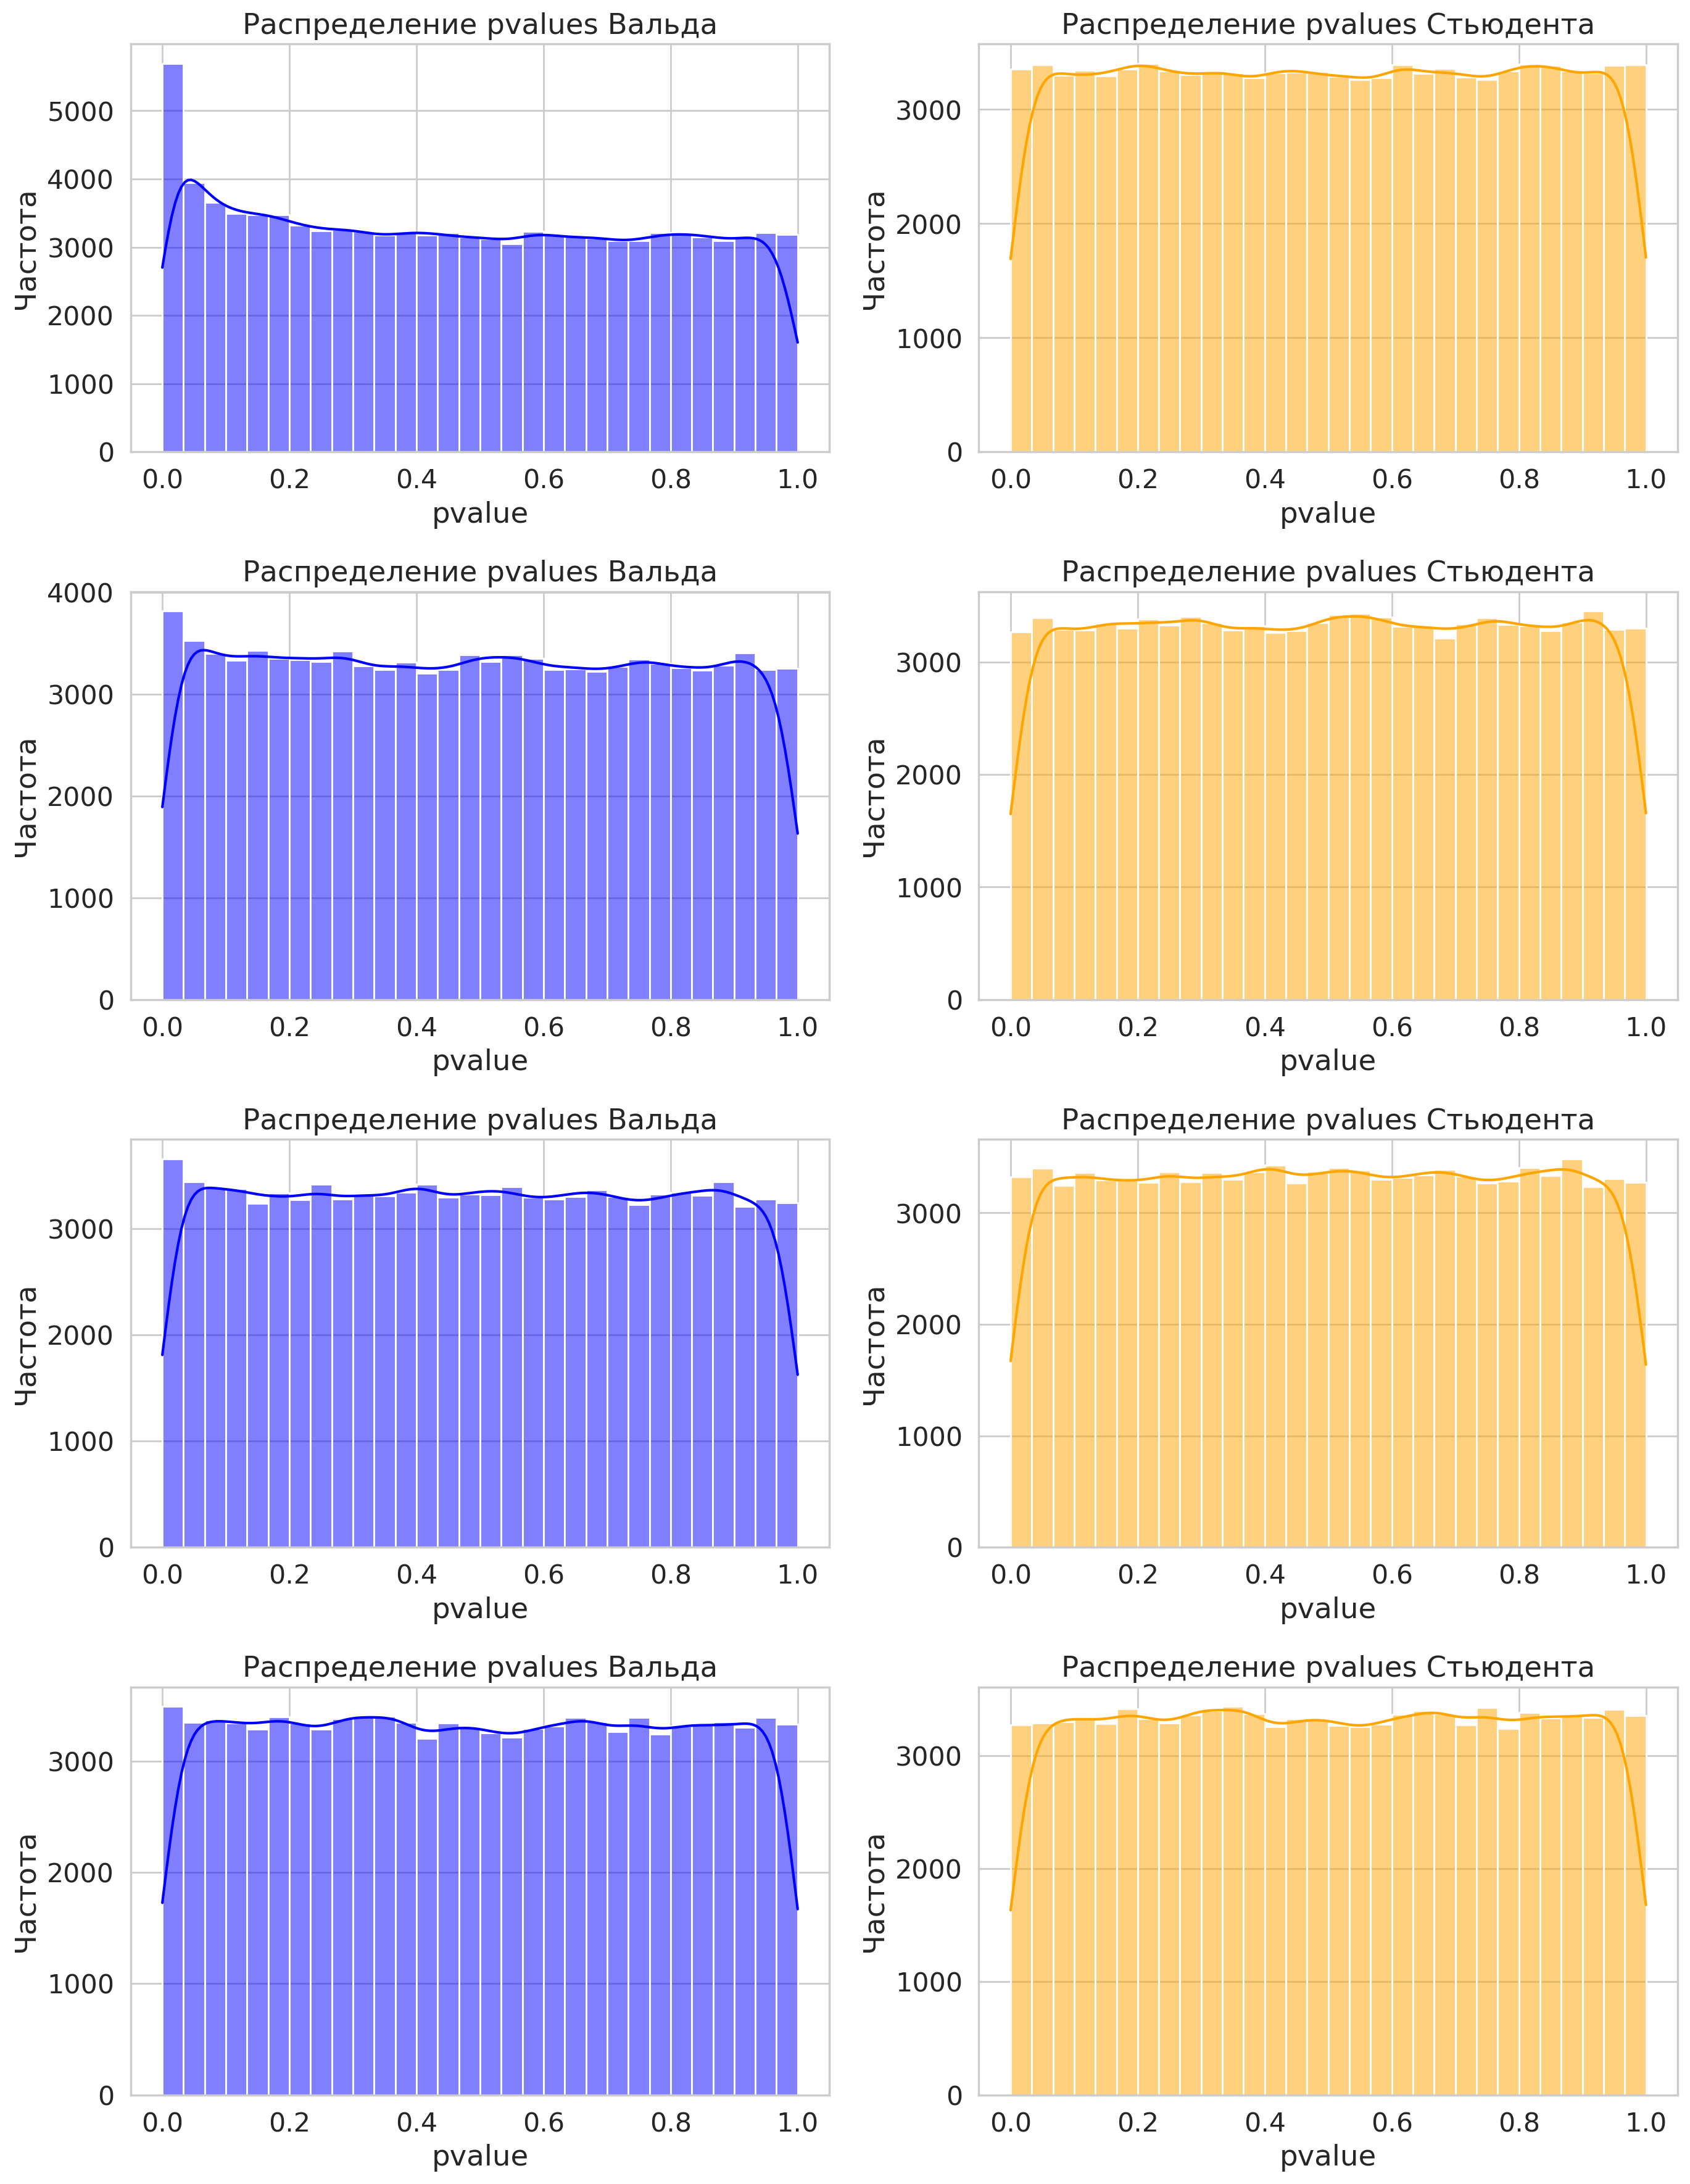

In [136]:
prefix_indices = [10, 40, 70, 100]

fig, ax = plt.subplots(4, 2, figsize=(14, 18))

for i in range(4):
    sns.histplot(W_pvalue[:, prefix_indices[i]], bins=30, kde=True, color='blue', label='pvalues Вальда', ax=ax[i, 0])
    ax[i, 0].set_title('Распределение pvalues Вальда')
    ax[i, 0].set_xlabel('pvalue')
    ax[i, 0].set_ylabel('Частота')

    sns.histplot(t_pvalue[:, prefix_indices[i]], bins=30, kde=True, color='orange', label='pvalues Стьюдента', ax=ax[i, 1])
    ax[i, 1].set_title('Распределение pvalues Стьюдента')
    ax[i, 1].set_xlabel('pvalue')
    ax[i, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Видим, что для теста Стьюдента и так всё хорошо, для всех рассмотренных префиксов распределение равномерное. Для теста Вальда при небольших размерах выборки есть небольшое смещение в сторону нуля, с ростом размера выборки распределение выравнивается и становится более равномерным, что согласуется с тем, что есть для его статистики есть сходимость к нормальному.

Оцените вероятность ошибки I рода критериев уровня значимости $\alpha = 0.05$ и нарисуйте график зависимости этой вероятности от размера выборки. На графике также нанесите доверительный интервал с помощью метода `plt.fill_between` (для удобства ДИ можно посчитать методом [`statsmodels.stats.proportion.proportion_confint`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html), который использовался в семинарском ноутбуке).

Оценка вероятности ошибки I рода - это доля pvalue $< 0.05$. Построим соответствующий график в зависимости от размера выборки (нарисуем для выборок размера хотя бы 5, потому что для совсем маленьких выборок, наверное, никакой анализ не годится).

In [137]:
def draw_prop(pvalue, label):
    pvalue_prop = np.sum(pvalue < 0.05, axis=0) / M
    
    conf_ints_lower, conf_ints_upper = proportion_confint(np.round(M * pvalue_prop), M)
    
    n_values = np.arange(1, n + 1)
    
    plt.figure(figsize=(12, 8))
    plt.plot(n_values[5:], pvalue_prop[5:], label='Доля pvalues < 0.05')
    plt.fill_between(n_values[5:], conf_ints_lower[5:], conf_ints_upper[5:], color='gray', alpha=0.3, label='Доверительный интервал')
    plt.axhline(0.05, color='red', linestyle='--')
    plt.xlabel('Размер выборки (n)')
    plt.ylabel('Доля')
    plt.title(f'Доля pvalues < 0.05 с ДИ для теста {label}')
    plt.legend()
    plt.show()

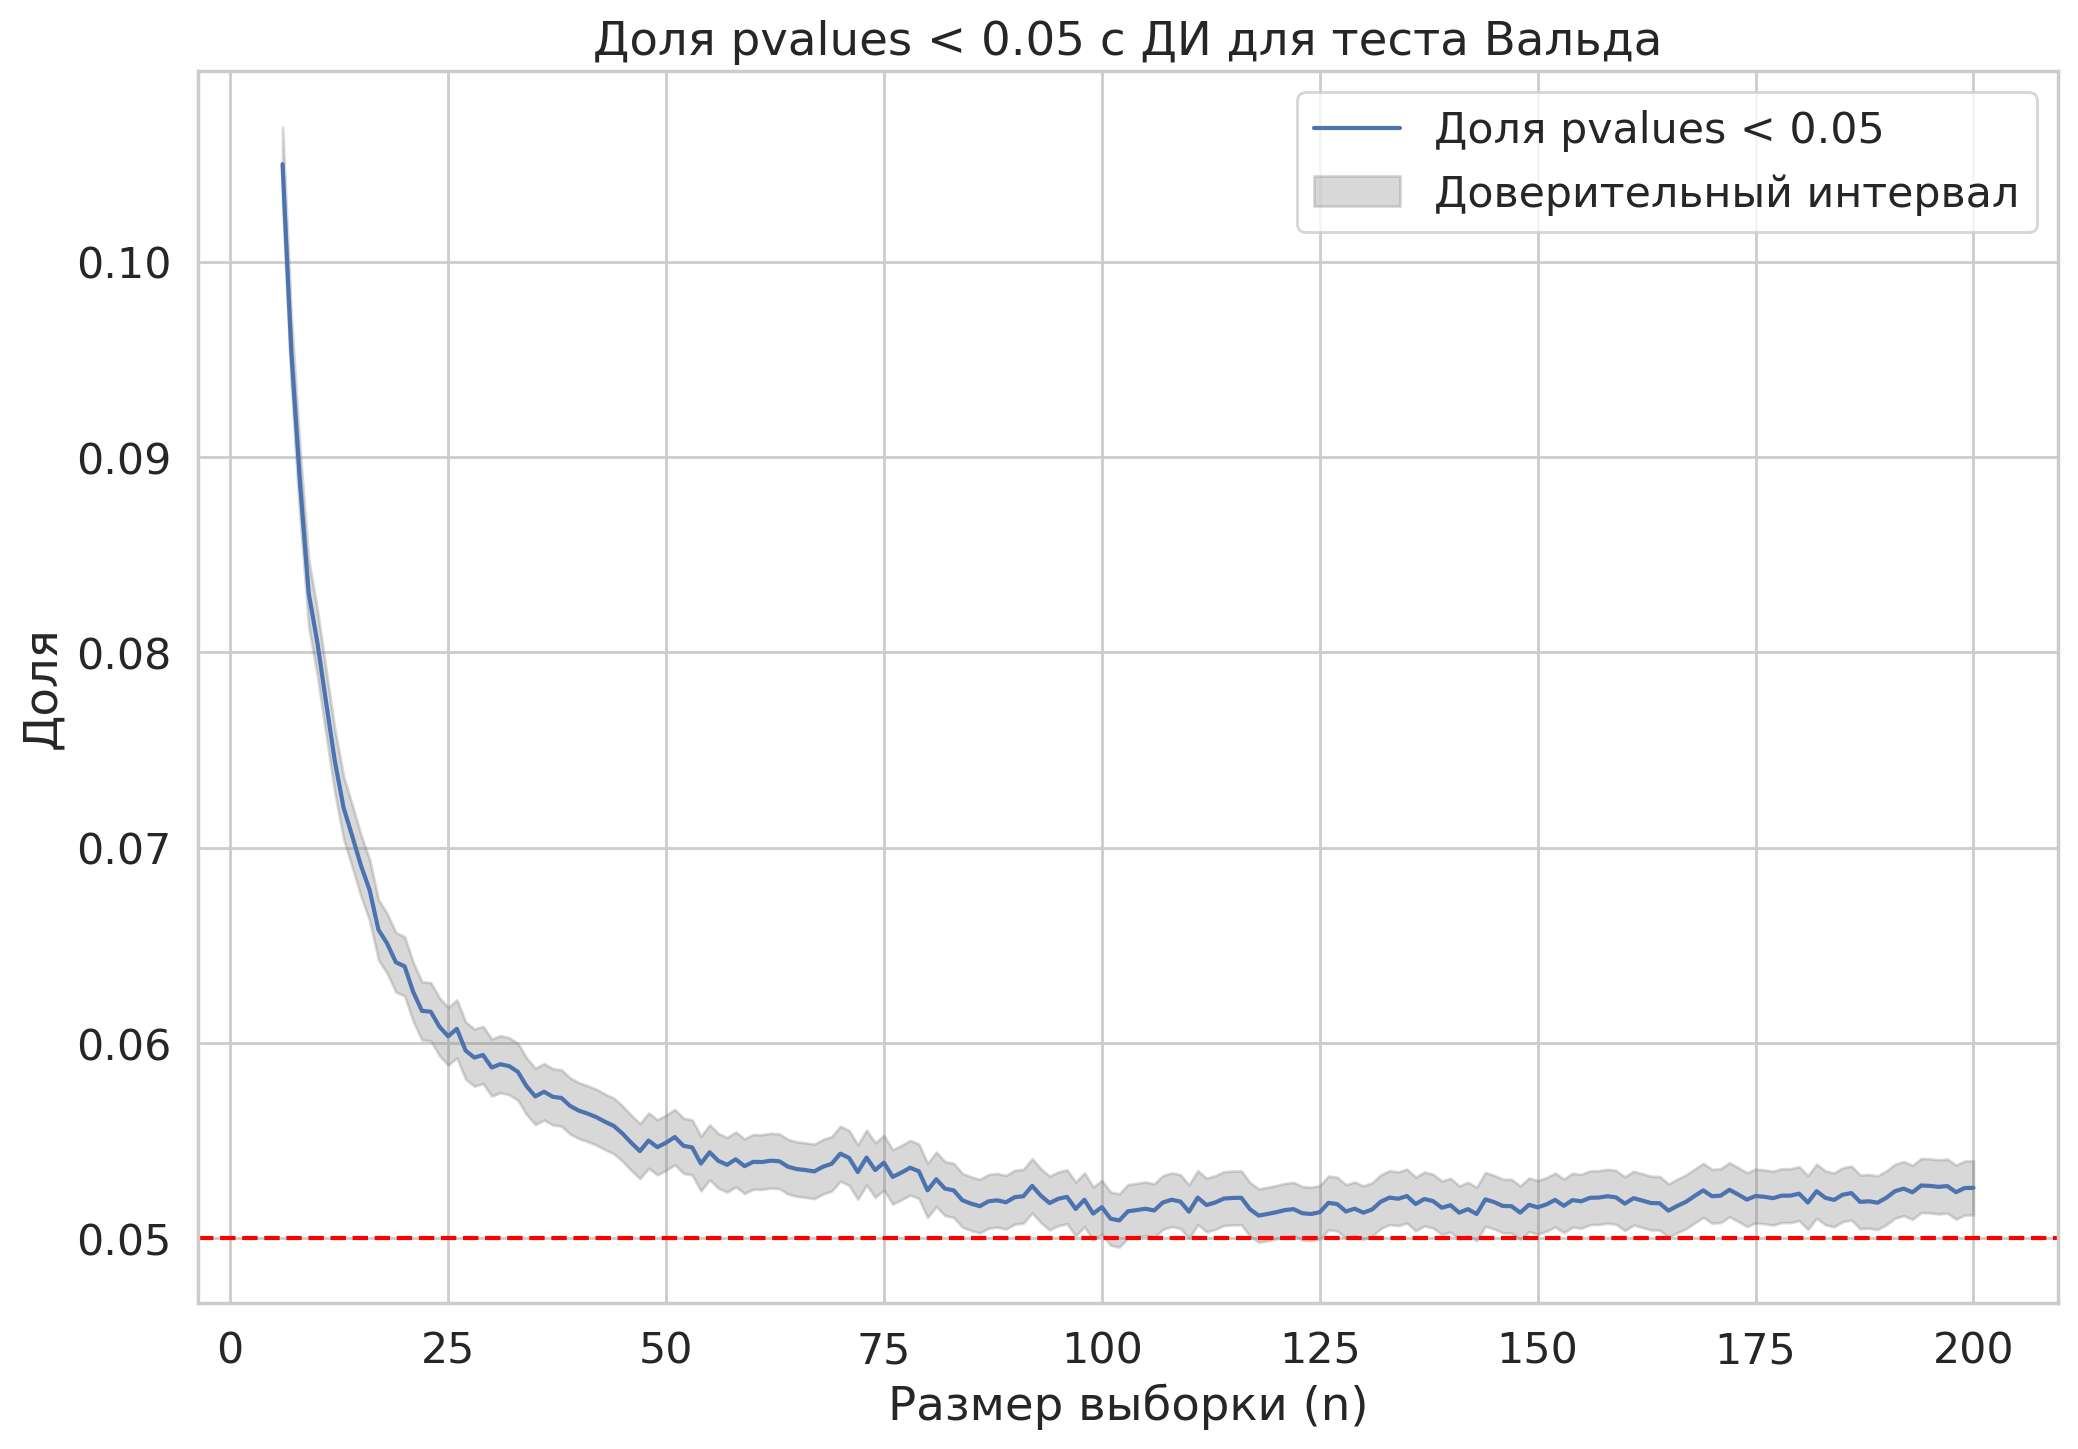

In [138]:
draw_prop(W_pvalue, 'Вальда')

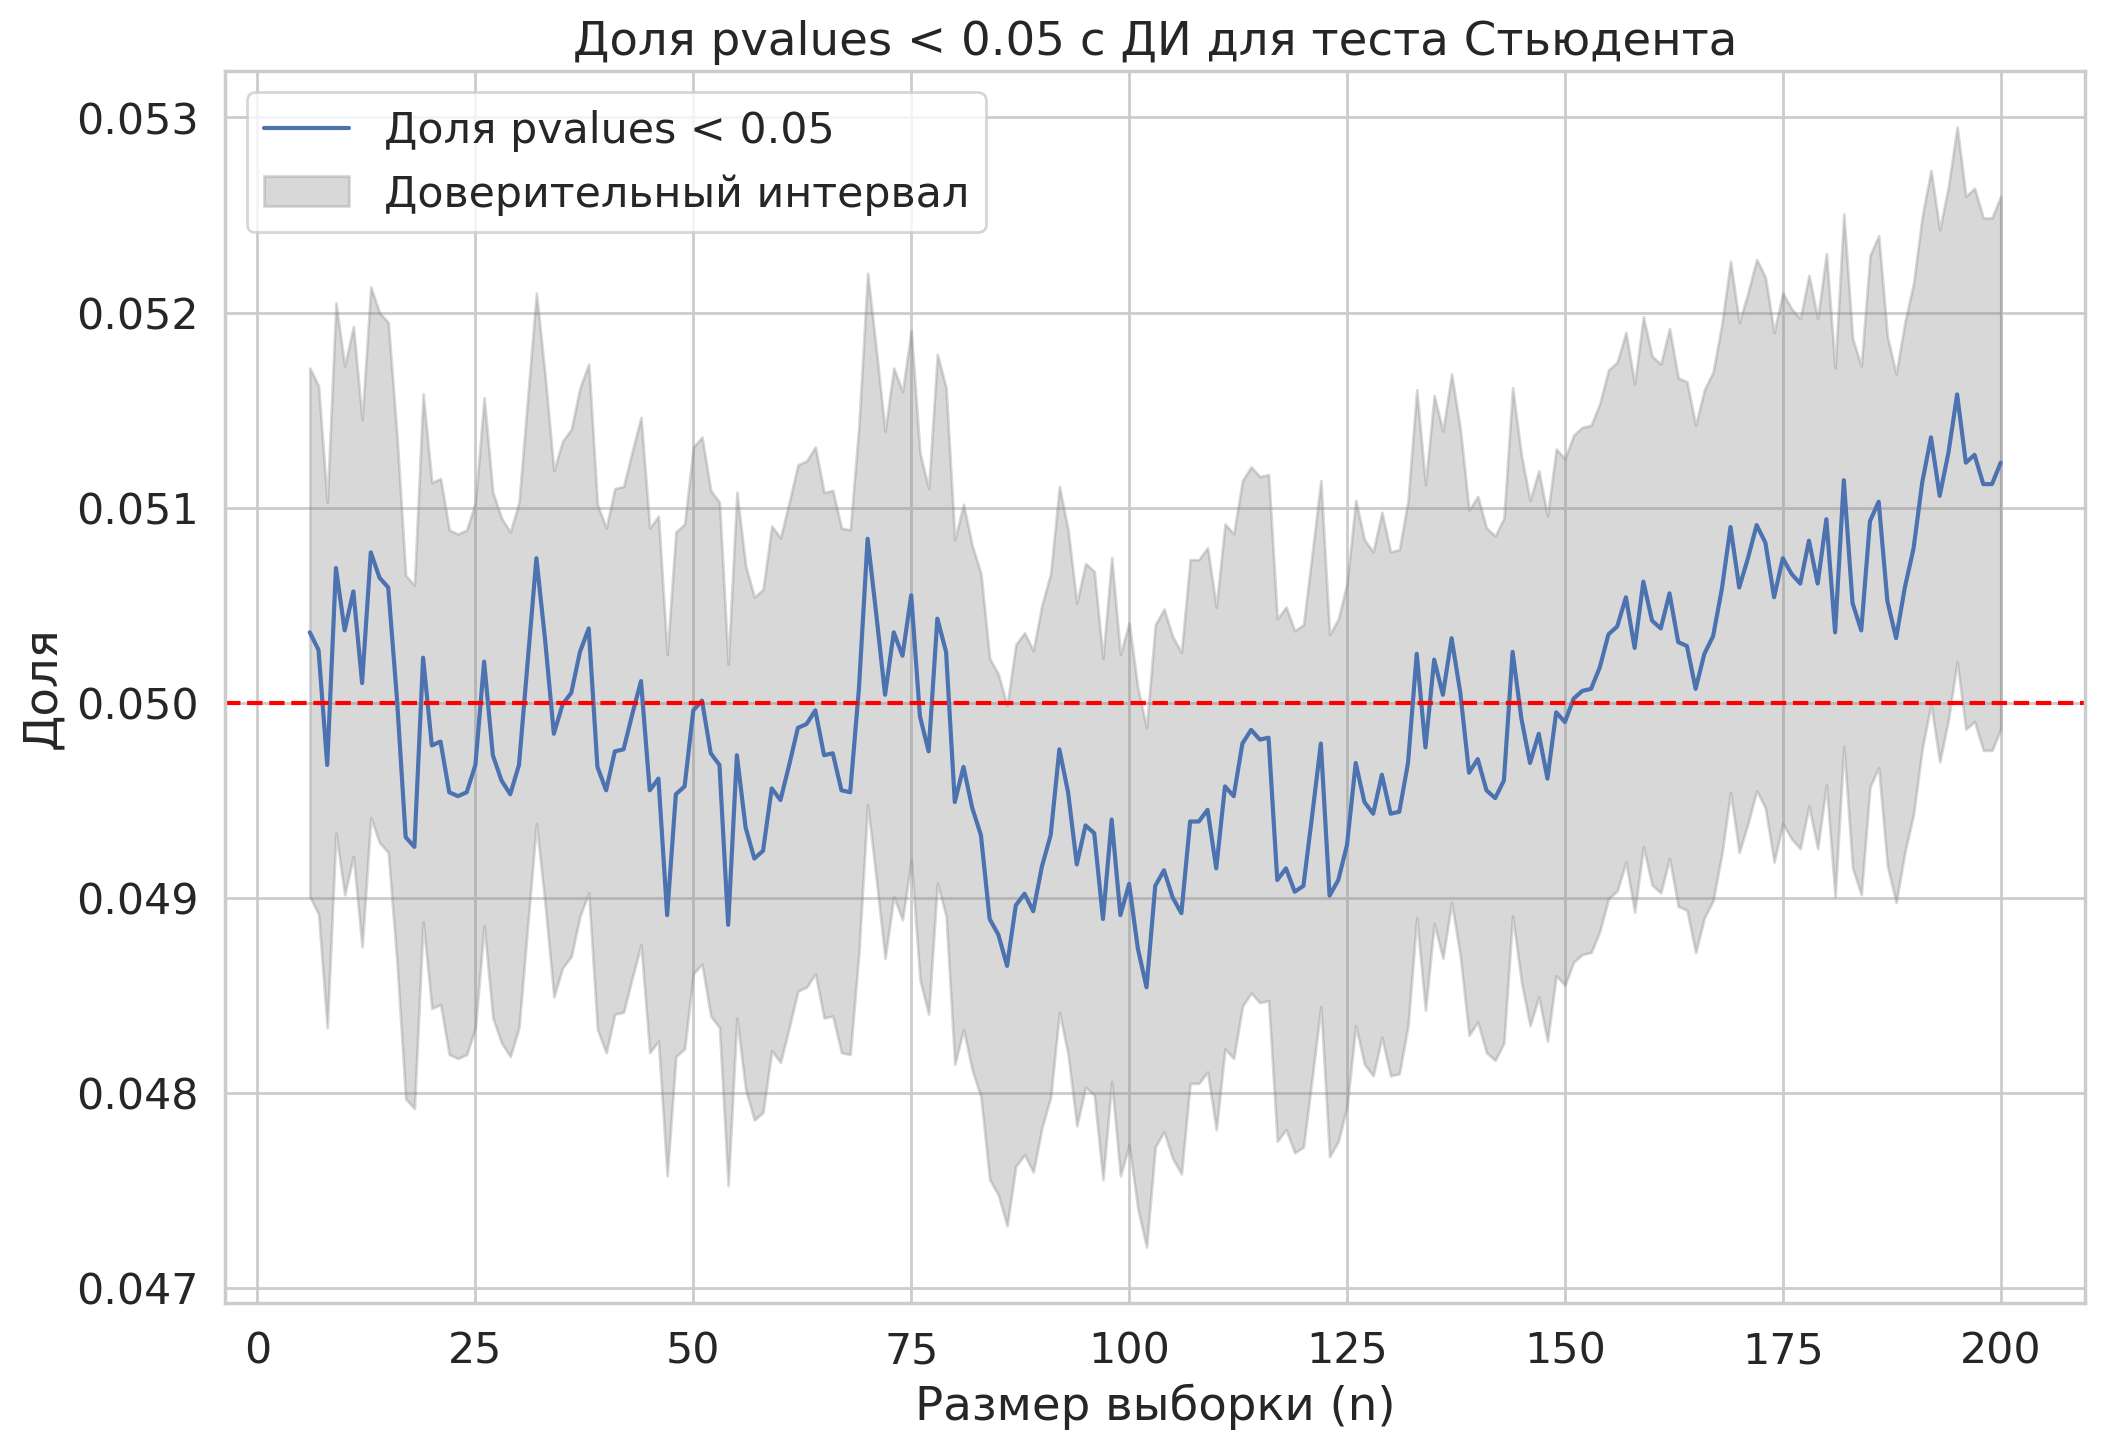

In [139]:
draw_prop(t_pvalue, 'Стьюдента')

2. Поговорим про требования к модели, которые использует критерий Стьюдента. Помимо, конечно, независимости выборок, важную роль играют нормальность и равенство дисперсий. Эти два требования довольно ограничительные, можно ли от них хотя бы частично отказаться? Начнём с первого.

Теперь давайте сэмплировать выборки не из нормального распределения, а из каких-то других. В качестве таковых возьмём:
- $\mathrm{T}_5$ (распределение Стьюдента с параметром 5) и $\mathrm{Laplace}$,
- $\mathrm{Pois}(1)$ и $\mathrm{U}\{1, \ldots, 10\}$,
- $\mathrm{Beta}(3, 3)$ и $\mathrm{U}[0; 1]$,
- $\mathrm{Beta}(5, 1)$ и $\mathcal{N}(0, 1)$,
- Пятую пару распределений предлагается придумать самим (рекомендуем "на полях" проделать пункт для данных пар, найти закономерность и предложить в качестве пятой пары что-то репрезентативное).

Насэмплируйте много (порядка 100000) пар выборок $(\mathbf X, \mathbf Y)$, каждая размера 20, где $\mathbf X$ будет иметь первое распределение из пары, а $\mathbf Y$ --- второе. Не забудьте, что мы находимся в рамках нулевой гипотезы (хоть и нормальности у нас нет), поэтому обязательно отнормируйте выборки так, чтобы у них были одинаковые среднее и дисперсия.

Нормировка: достаточно каждую выборку поделить на соответствующее стандартное отклонение.  
В качестве пятой пары рассмотрим $Exp(1)$ и $\Gamma(2, 2)$, чтобы посмотреть, что бывает, если взять распределения, которые асимметричны и их хвост тяжелее нормального.

In [151]:
M = 100000
n = 20

std_discrete_uniform = np.sqrt(99 / 12)

samples = np.array([[sps.t.rvs(df=5, size=(M, n)) / sps.t.std(df=5),
                     sps.laplace.rvs(size=(M, n)) / sps.laplace.std()],
                    [sps.poisson.rvs(1, size=(M, n)) - 1,
                     (sps.randint.rvs(1, 11, size=(M, n)) - 5.5) / std_discrete_uniform],
                    [(sps.beta.rvs(3, 3, size=(M, n)) - sps.beta.mean(3, 3)) / sps.beta.std(3, 3),
                     (sps.uniform.rvs(size=(M, n)) - 0.5) / sps.uniform.std()],
                    [(sps.beta.rvs(5, 1, size=(M, n)) - sps.beta.mean(5, 1)) / sps.beta.std(5, 1),
                     sps.norm.rvs(size=(M, n))],
                    [(sps.expon.rvs(size=(M, n)) - sps.expon.mean()) / sps.expon.std(),
                     (sps.gamma.rvs(2, 2, size=(M, n)) - sps.gamma.mean(2, 2)) / sps.gamma.std(2, 2)]])

Визуализируйте распределение pvalue и постройте ДИ для ошибки I рода для каждого из пяти случаев.

In [152]:
def Wtest(X, Y):
    n = X.shape[1]
    X_mean = X.mean(axis=1)
    Y_mean = Y.mean(axis=1)
    X_var = X.var(axis=1, ddof=1)
    Y_var = Y.var(axis=1, ddof=1)
    
    W_stat = (X_mean - Y_mean) / np.sqrt((X_var + Y_var) / n)
    W_pvalue = 2 * (1 - sps.norm.cdf(np.abs(W_stat)))
    return W_pvalue

def ttest(X,  Y):
    _, pvalue = sps.ttest_ind(X, Y, axis=1)
    return pvalue

W_pvalues = []
t_pvalues = []
W_confint = []
t_confint = []

for X, Y in samples:
    W_pvalues.append(Wtest(X, Y))
    t_pvalues.append(ttest(X, Y))

for i in range(len(samples)):
    W_confint.append(proportion_confint((W_pvalues[i] < 0.05).sum(), M))
    t_confint.append(proportion_confint((t_pvalues[i] < 0.05).sum(), M))

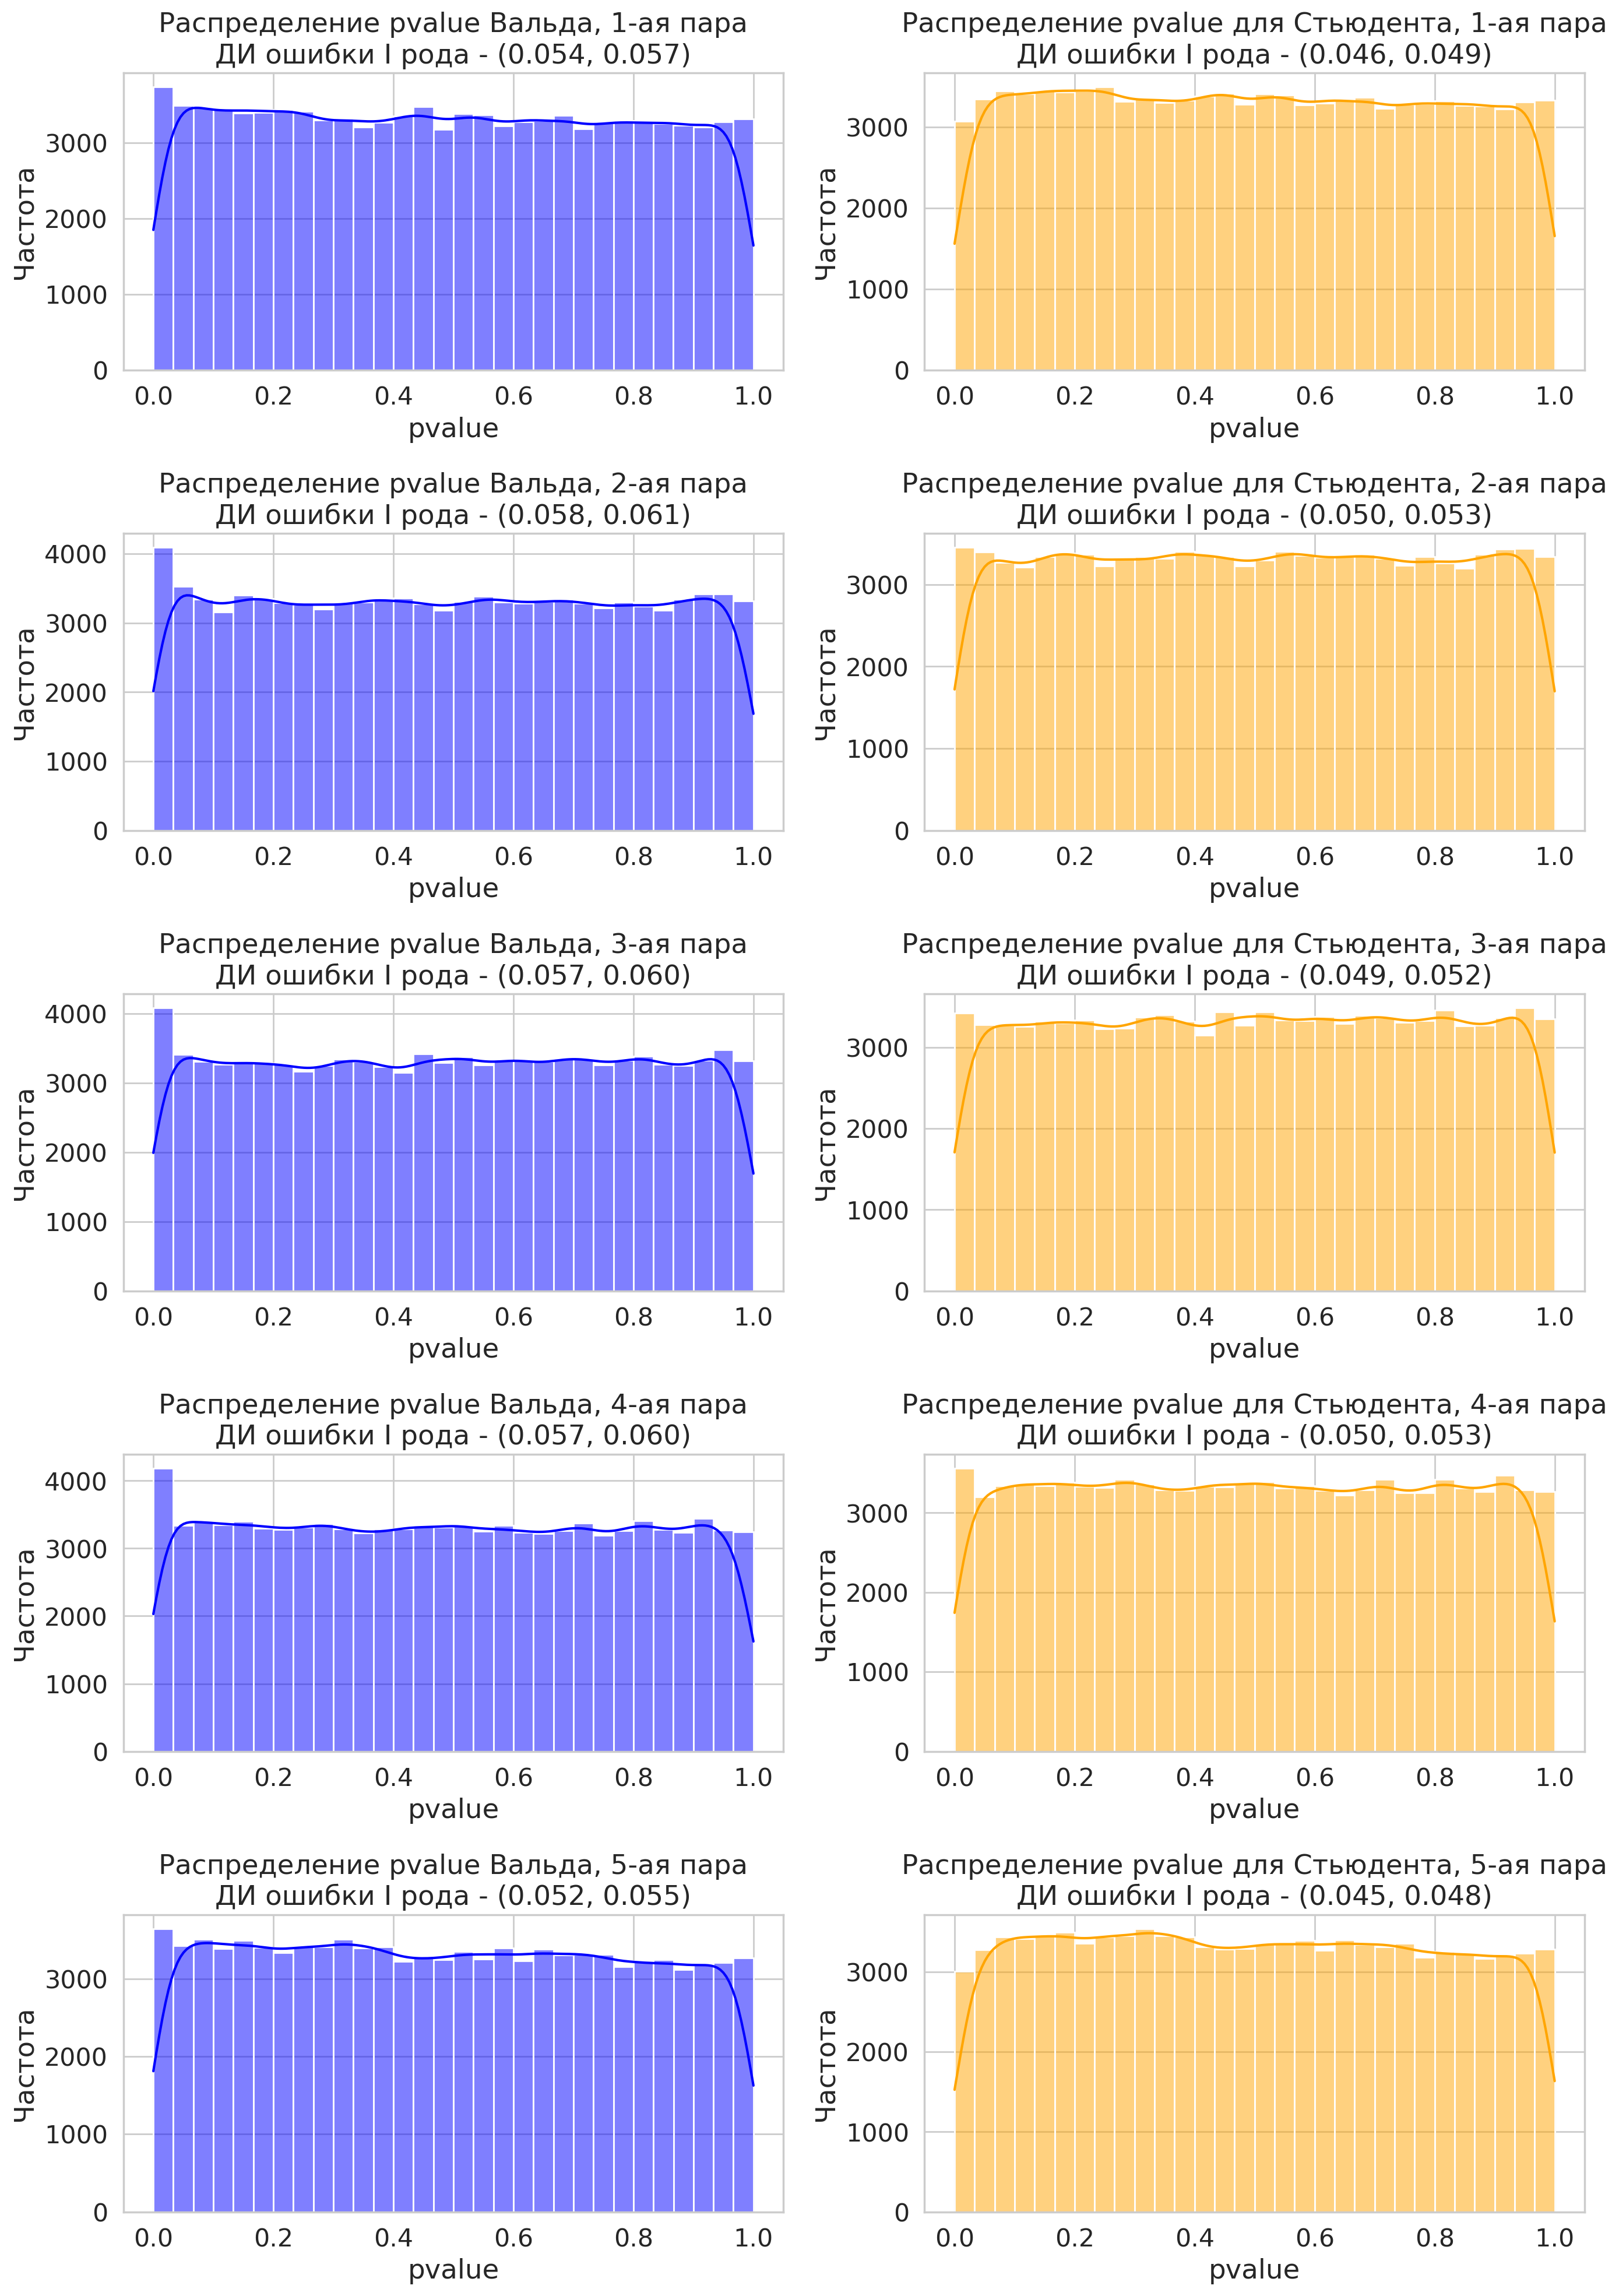

In [154]:
fig, ax = plt.subplots(len(samples), 2, figsize=(14, 20))

for i in range(len(samples)):
    sns.histplot(W_pvalues[i], bins=30, kde=True, color='blue', label='pvalues Вальда', ax=ax[i, 0])
    ax[i, 0].set_title(f'Распределение pvalue Вальда, {i + 1}-ая пара\nДИ ошибки I рода - ({W_confint[i][0]:0.3f}, {W_confint[i][1]:0.3f})')
    ax[i, 0].set_xlabel('pvalue')
    ax[i, 0].set_ylabel('Частота')

    sns.histplot(t_pvalues[i], bins=30, kde=True, color='orange', label='pvalues Стьюдента', ax=ax[i, 1])
    ax[i, 1].set_title(f'Распределение pvalue для Стьюдента, {i + 1}-ая пара\nДИ ошибки I рода - ({t_confint[i][0]:0.3f}, {t_confint[i][1]:0.3f})')
    ax[i, 1].set_xlabel('pvalue')
    ax[i, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

3. Теперь перейдём к равенству дисперсий. Давайте проверим, контролирует ли t-критерий ошибку I рода, если ему на вход дать две нормальные выборки с равными средними, но не равными дисперсиями.

Насэмплируйте много (порядка 100000) нормальных выборок из $\mathcal{N}(0, 1)$ и посчитайте pvalue для разных размеров выборки (возьмите 3-4 значений в пределах от 10 до 100) и разных значений дисперсий (первые выборки оставьте без изменений, а вторые домножьте на взятые вами значения). Напоминаем, что использовать циклы for (кроме как для визуализации) -- моветон. Сделайте выводы.

In [197]:
M = 50000
sample_sizes = [10, 40, 70, 100]
scales = [20, 100, 200]
alpha = 0.05

X = []
Y = [[] for _ in scales]
t_pvalues = [[] for _ in scales]
t_confint = [[] for _ in scales]

for n in sample_sizes:
    X.append(sps.norm.rvs(size=(M, n)))
    for i, scale in enumerate(scales):
        Y[i].append(sps.norm.rvs(scale=scale, size=(M, n)))
        t_pvalues[i].append(sps.ttest_ind(X[-1], Y[i][-1], axis=1, equal_var=True)[1])

for i in range(len(scales)):
    for j in range(len(sample_sizes)):
        t_confint[i].append(proportion_confint((t_pvalues[i][j] < 0.05).sum(), M))

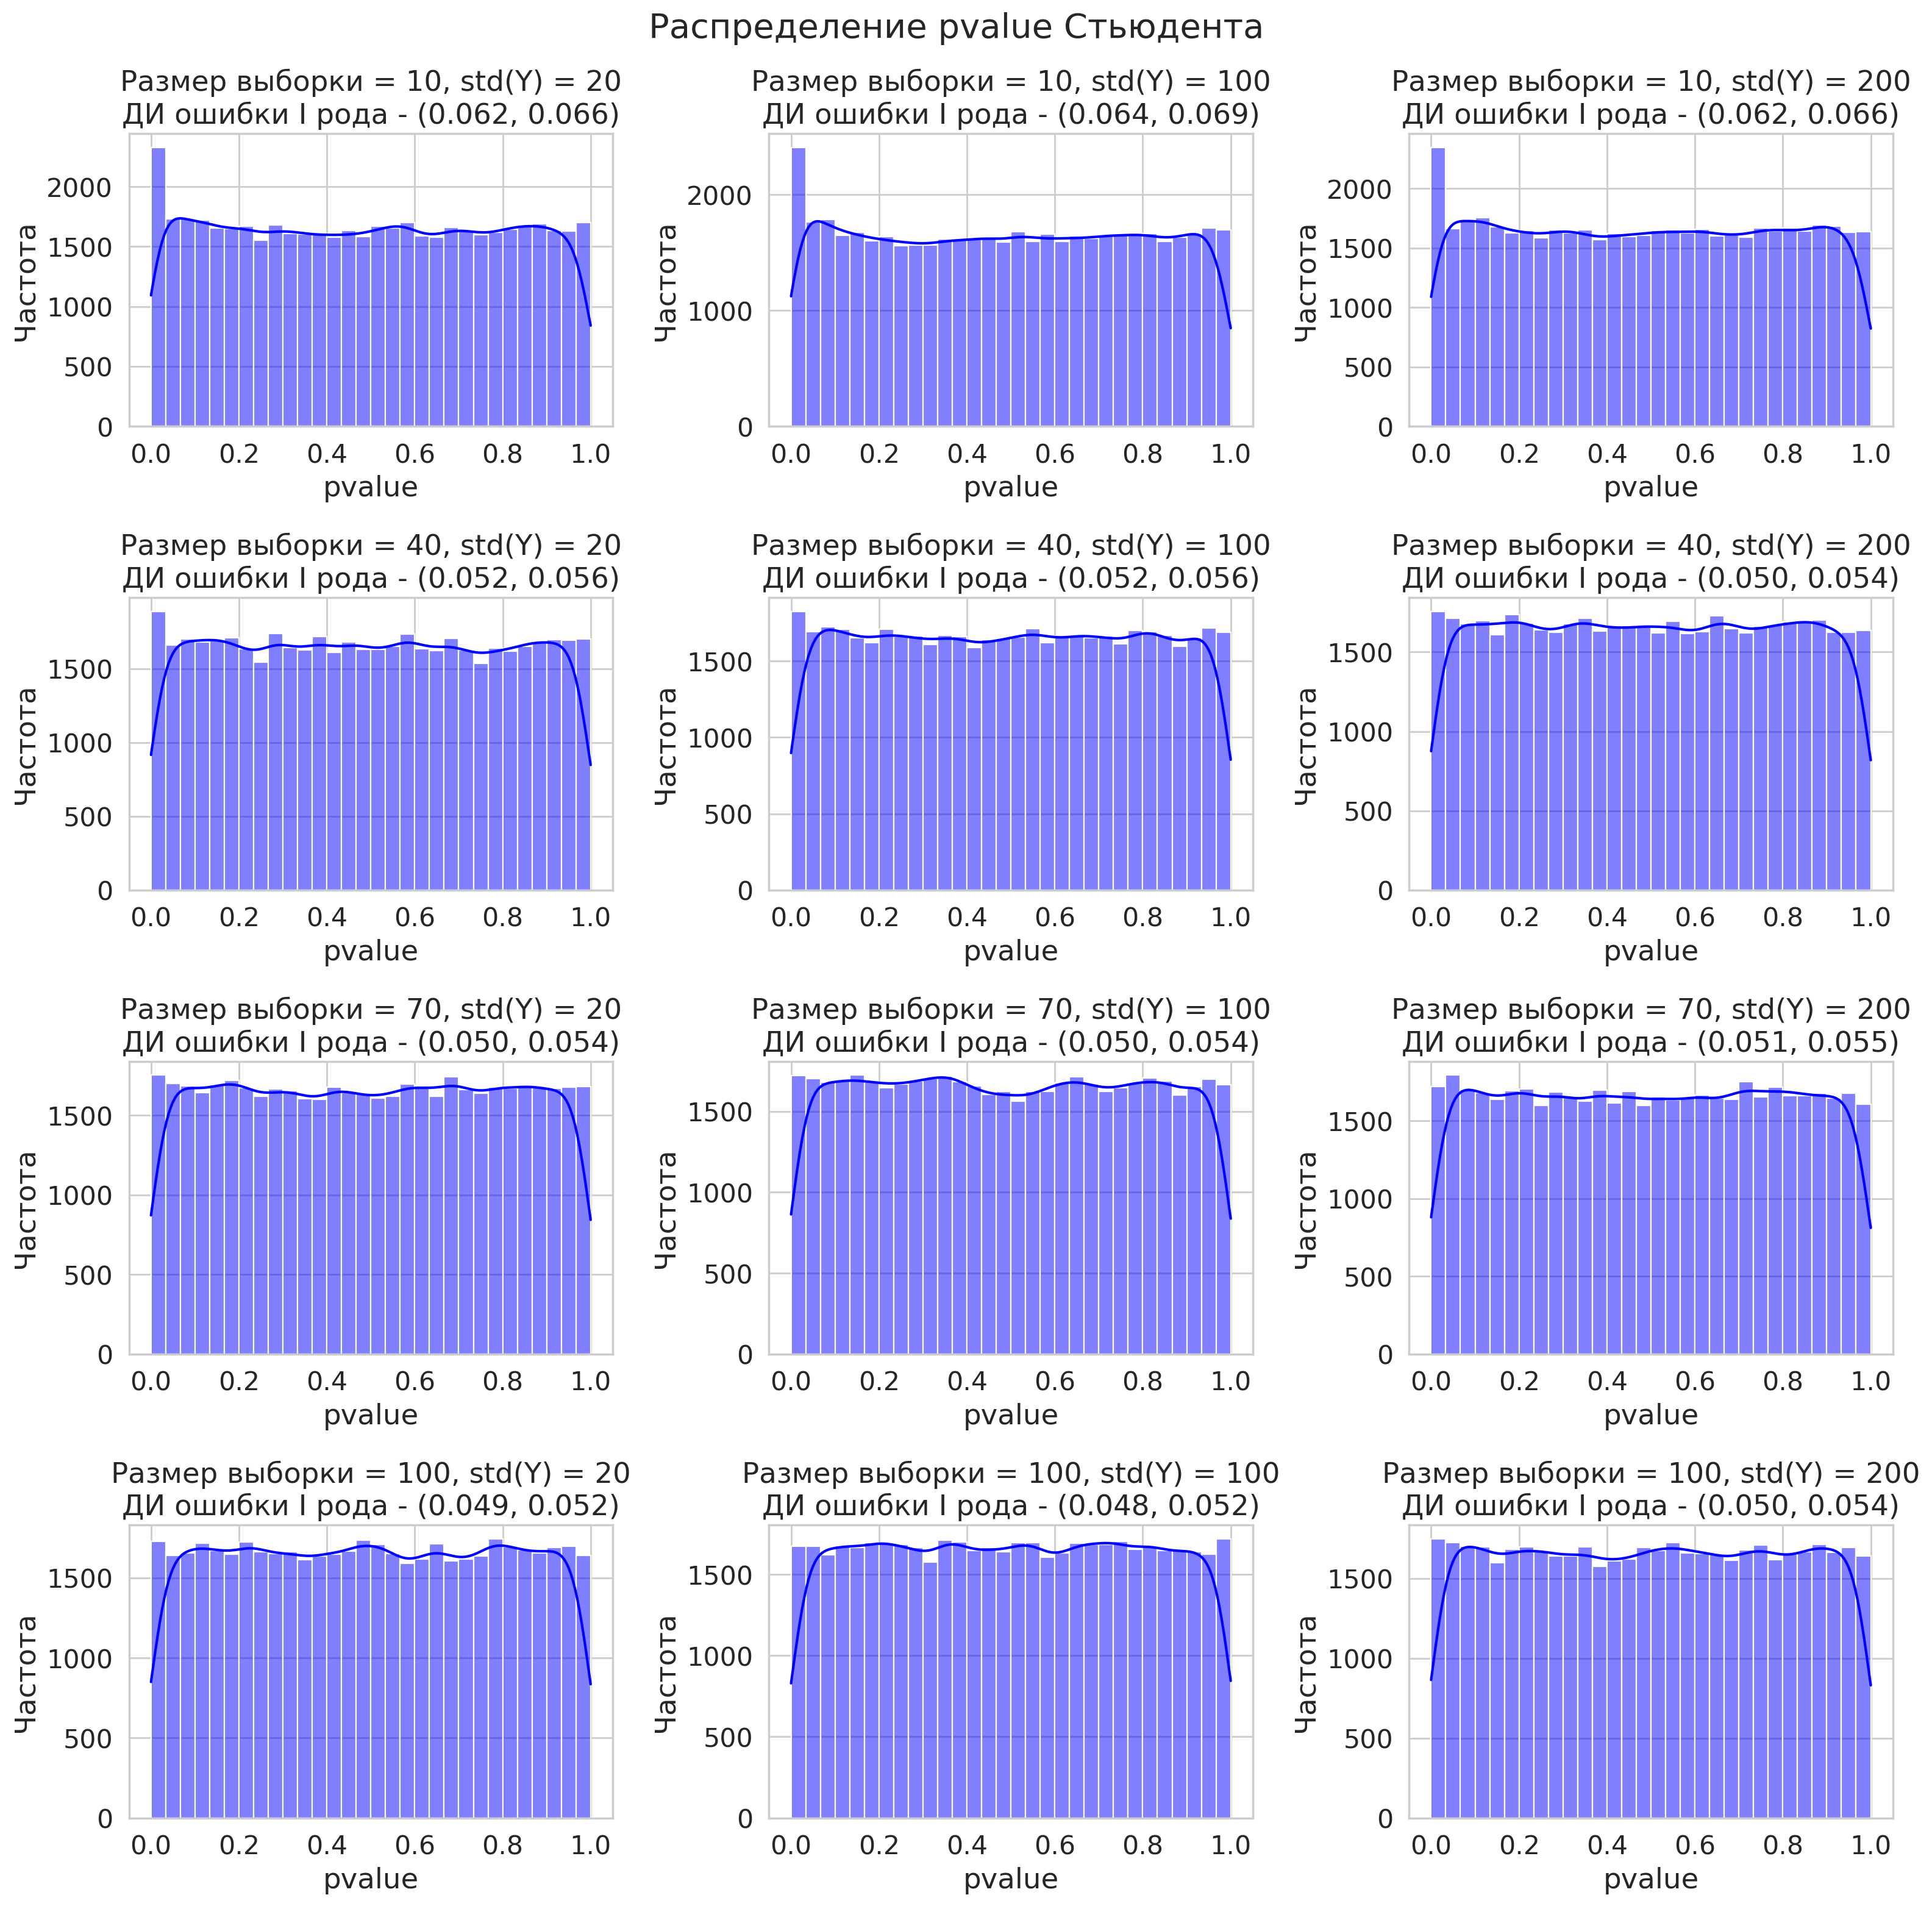

In [201]:
fig, ax = plt.subplots(len(sample_sizes), len(scales), figsize=(16, 16))

for i in range(len(sample_sizes)):
    for j in range(len(scales)):
        sns.histplot(t_pvalues[j][i], bins=30, kde=True, color='blue', ax=ax[i, j])
        ax[i, j].set_title(f'Размер выборки = {sample_sizes[i]}, std(Y) = {scales[j]}\nДИ ошибки I рода - ({t_confint[j][i][0]:0.3f}, {t_confint[j][i][1]:0.3f})')
        ax[i, j].set_xlabel('pvalue')
        ax[i, j].set_ylabel('Частота')

plt.suptitle('Распределение pvalue Стьюдента')
plt.tight_layout()
plt.show()

В целом видим, что с увеличением дисперсии распределение pvalue смещается к нулю, а с увеличением размера выборок становится более равномерным, что вполне логично: отклоняемся от условий теоремы - получаем увеличение вероятности ошибки I рода, но с ростом размера выборок это уменьшается до допустимого уровня значимости.

Что же делать, если мы ничего не знаем про то, равны ли дисперсии у выборок или нет? В таком случае можно использовать так называемый [критерий Уэлча](https://en.wikipedia.org/wiki/Welch%27s_t-test). Он берёт под копотом похожую статистику, что и t-критерий, но для подсчёта pvalue использует функцию распределения Стьюдента с числом степеней свободы, *зависящим от выборок*. Оказывается, такой подгон даёт свои плоды (его мотивацию можно почитать по ссылке). Давайте проверим, что ошибка I рода у такого критерия уже будет контролироваться. Для этого проведите процедуру выше, но вместо t-критерия используйте критерий Уэлча (для этого достаточно в функцию `ttest_ind` прокинуть аргумент `equal_var=False`).

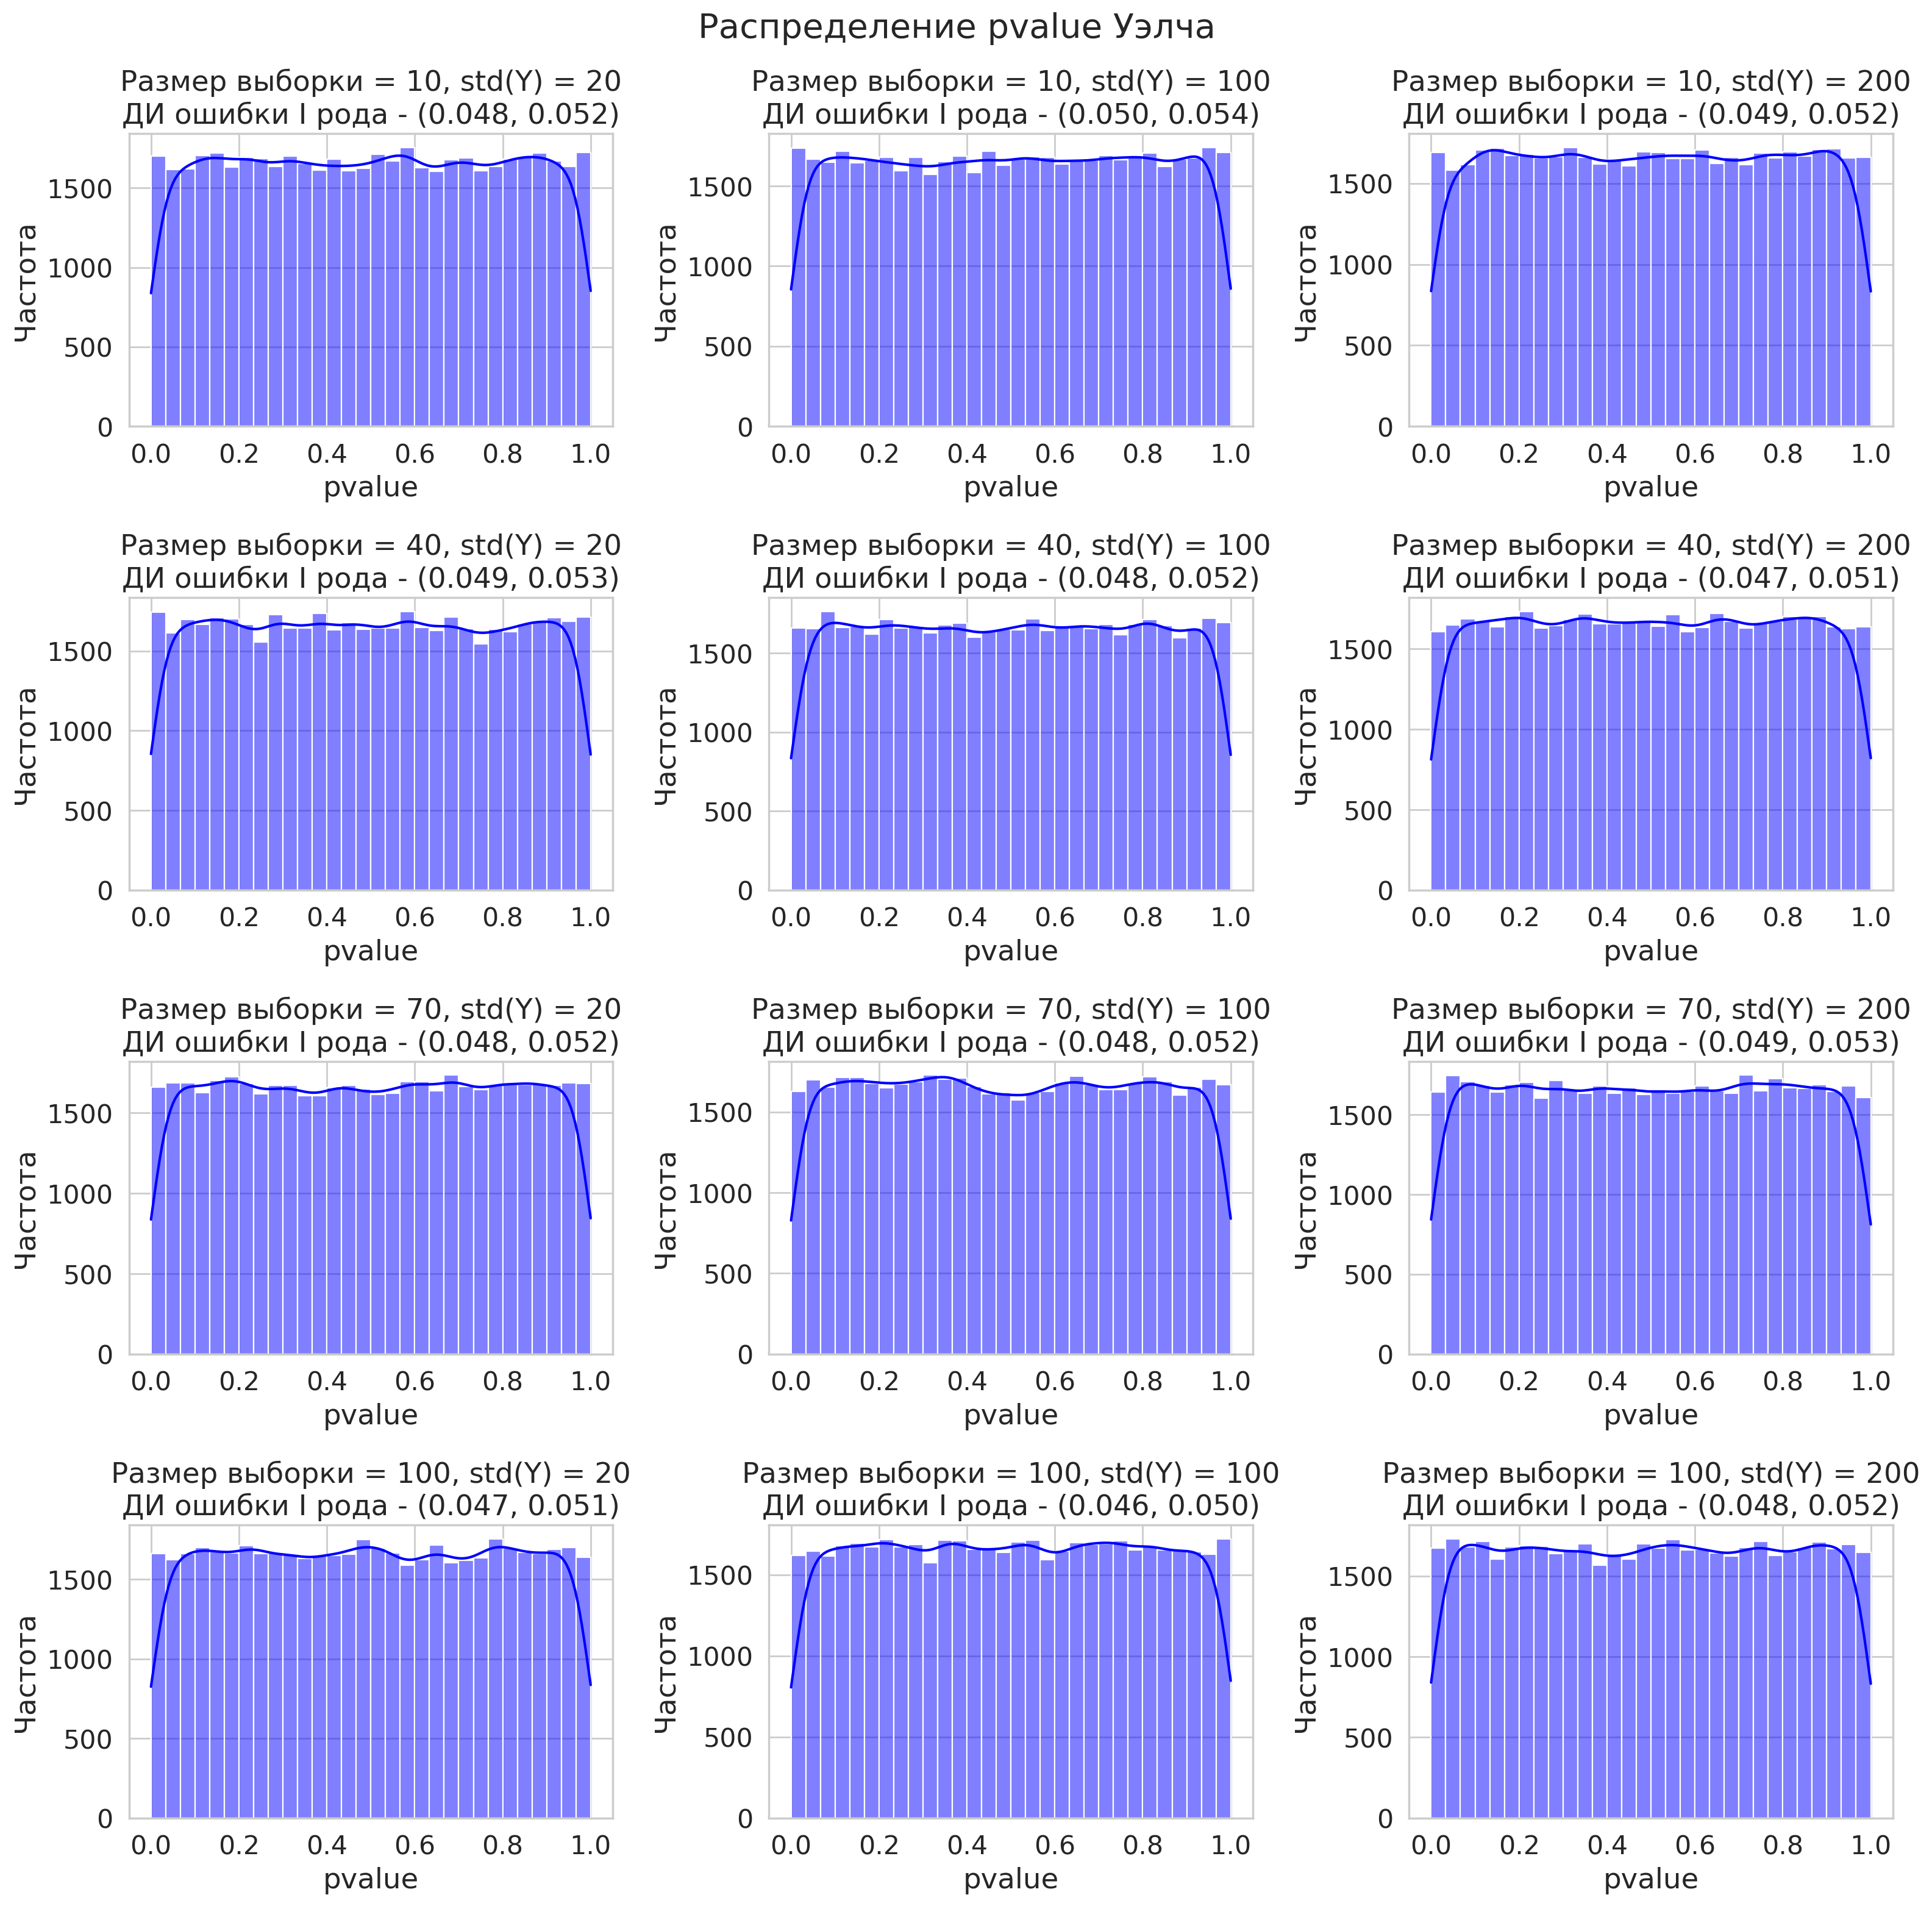

In [203]:
welch_pvalues = [[] for _ in scales]
welch_confint = [[] for _ in scales]

for i in range(len(scales)):
    for j in range(len(sample_sizes)):
        welch_pvalues[i].append(sps.ttest_ind(X[j], Y[i][j], axis=1, equal_var=False)[1])

for i in range(len(scales)):
    for j in range(len(sample_sizes)):
        welch_confint[i].append(proportion_confint((welch_pvalues[i][j] < 0.05).sum(), M))

fig, ax = plt.subplots(len(sample_sizes), len(scales), figsize=(16, 16))

for i in range(len(sample_sizes)):
    for j in range(len(scales)):
        sns.histplot(welch_pvalues[j][i], bins=30, kde=True, color='blue', ax=ax[i, j])
        ax[i, j].set_title(f'Размер выборки = {sample_sizes[i]}, std(Y) = {scales[j]}\nДИ ошибки I рода - ({welch_confint[j][i][0]:0.3f}, {welch_confint[j][i][1]:0.3f})')
        ax[i, j].set_xlabel('pvalue')
        ax[i, j].set_ylabel('Частота')

plt.suptitle('Распределение pvalue Уэлча')
plt.tight_layout()
plt.show()

Как видим, критерий Уэлча действительно сохраняет нужный уровень значимости дальше для большой разнице в дисперсиях, круто)

Почему же мы не забьём на t-критерий и не используем везде критерий Уэлча? Может быть он хуже отвергает неверную нулевую гипотезу? Для этого сравним эти критерии на предмет мощности, то есть способности отвергать нулевую гипотезу при верности альтернативы.

Чтобы сэмплировать выборки из альтернативы, достаточно сгенерировать много пар выборок из $\mathcal{N}(0, 1)$ и прибавить ко вторым выборкам смещение $\Delta \ne 0$ --- таким образом мы получим распределение из альтернативы.

Для разных значений $\Delta$ (значения берите по какой-нибудь достаточно мелкой сетке) и разных размеров выборки (попробуйте также брать выборки в парах разных размеров, достаточно рассмотреть 4 пары значений) оцените вероятность отвержения нулевой гипотезы на уровне значимости 0.05 и постройте график зависимости мощности от смещения $\Delta$. Сделайте выводы.

In [211]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

M = 50000
sample_sizes = [(10, 10), (20, 20), (10, 30), (20, 100)]
delta_range = np.linspace(0, 2, 50)
alpha = 0.05

results_t = []
results_welch = []

for n1, n2 in sample_sizes:
    X = sps.norm.rvs(size=(M, n1))
    Y_base = sps.norm.rvs(size=(M, n2))

    t_powers = []
    welch_powers = []
    for delta in delta_range:
        Y = Y_base + delta

        t_pvalues = sps.ttest_ind(X, Y, axis=1, equal_var=True)[1]
        t_powers.append((t_pvalues < alpha).mean())

        welch_pvalues = sps.ttest_ind(X, Y, axis=1, equal_var=False)[1]
        welch_powers.append((welch_pvalues < alpha).mean())

    results_t.append(t_powers)
    results_welch.append(welch_powers)

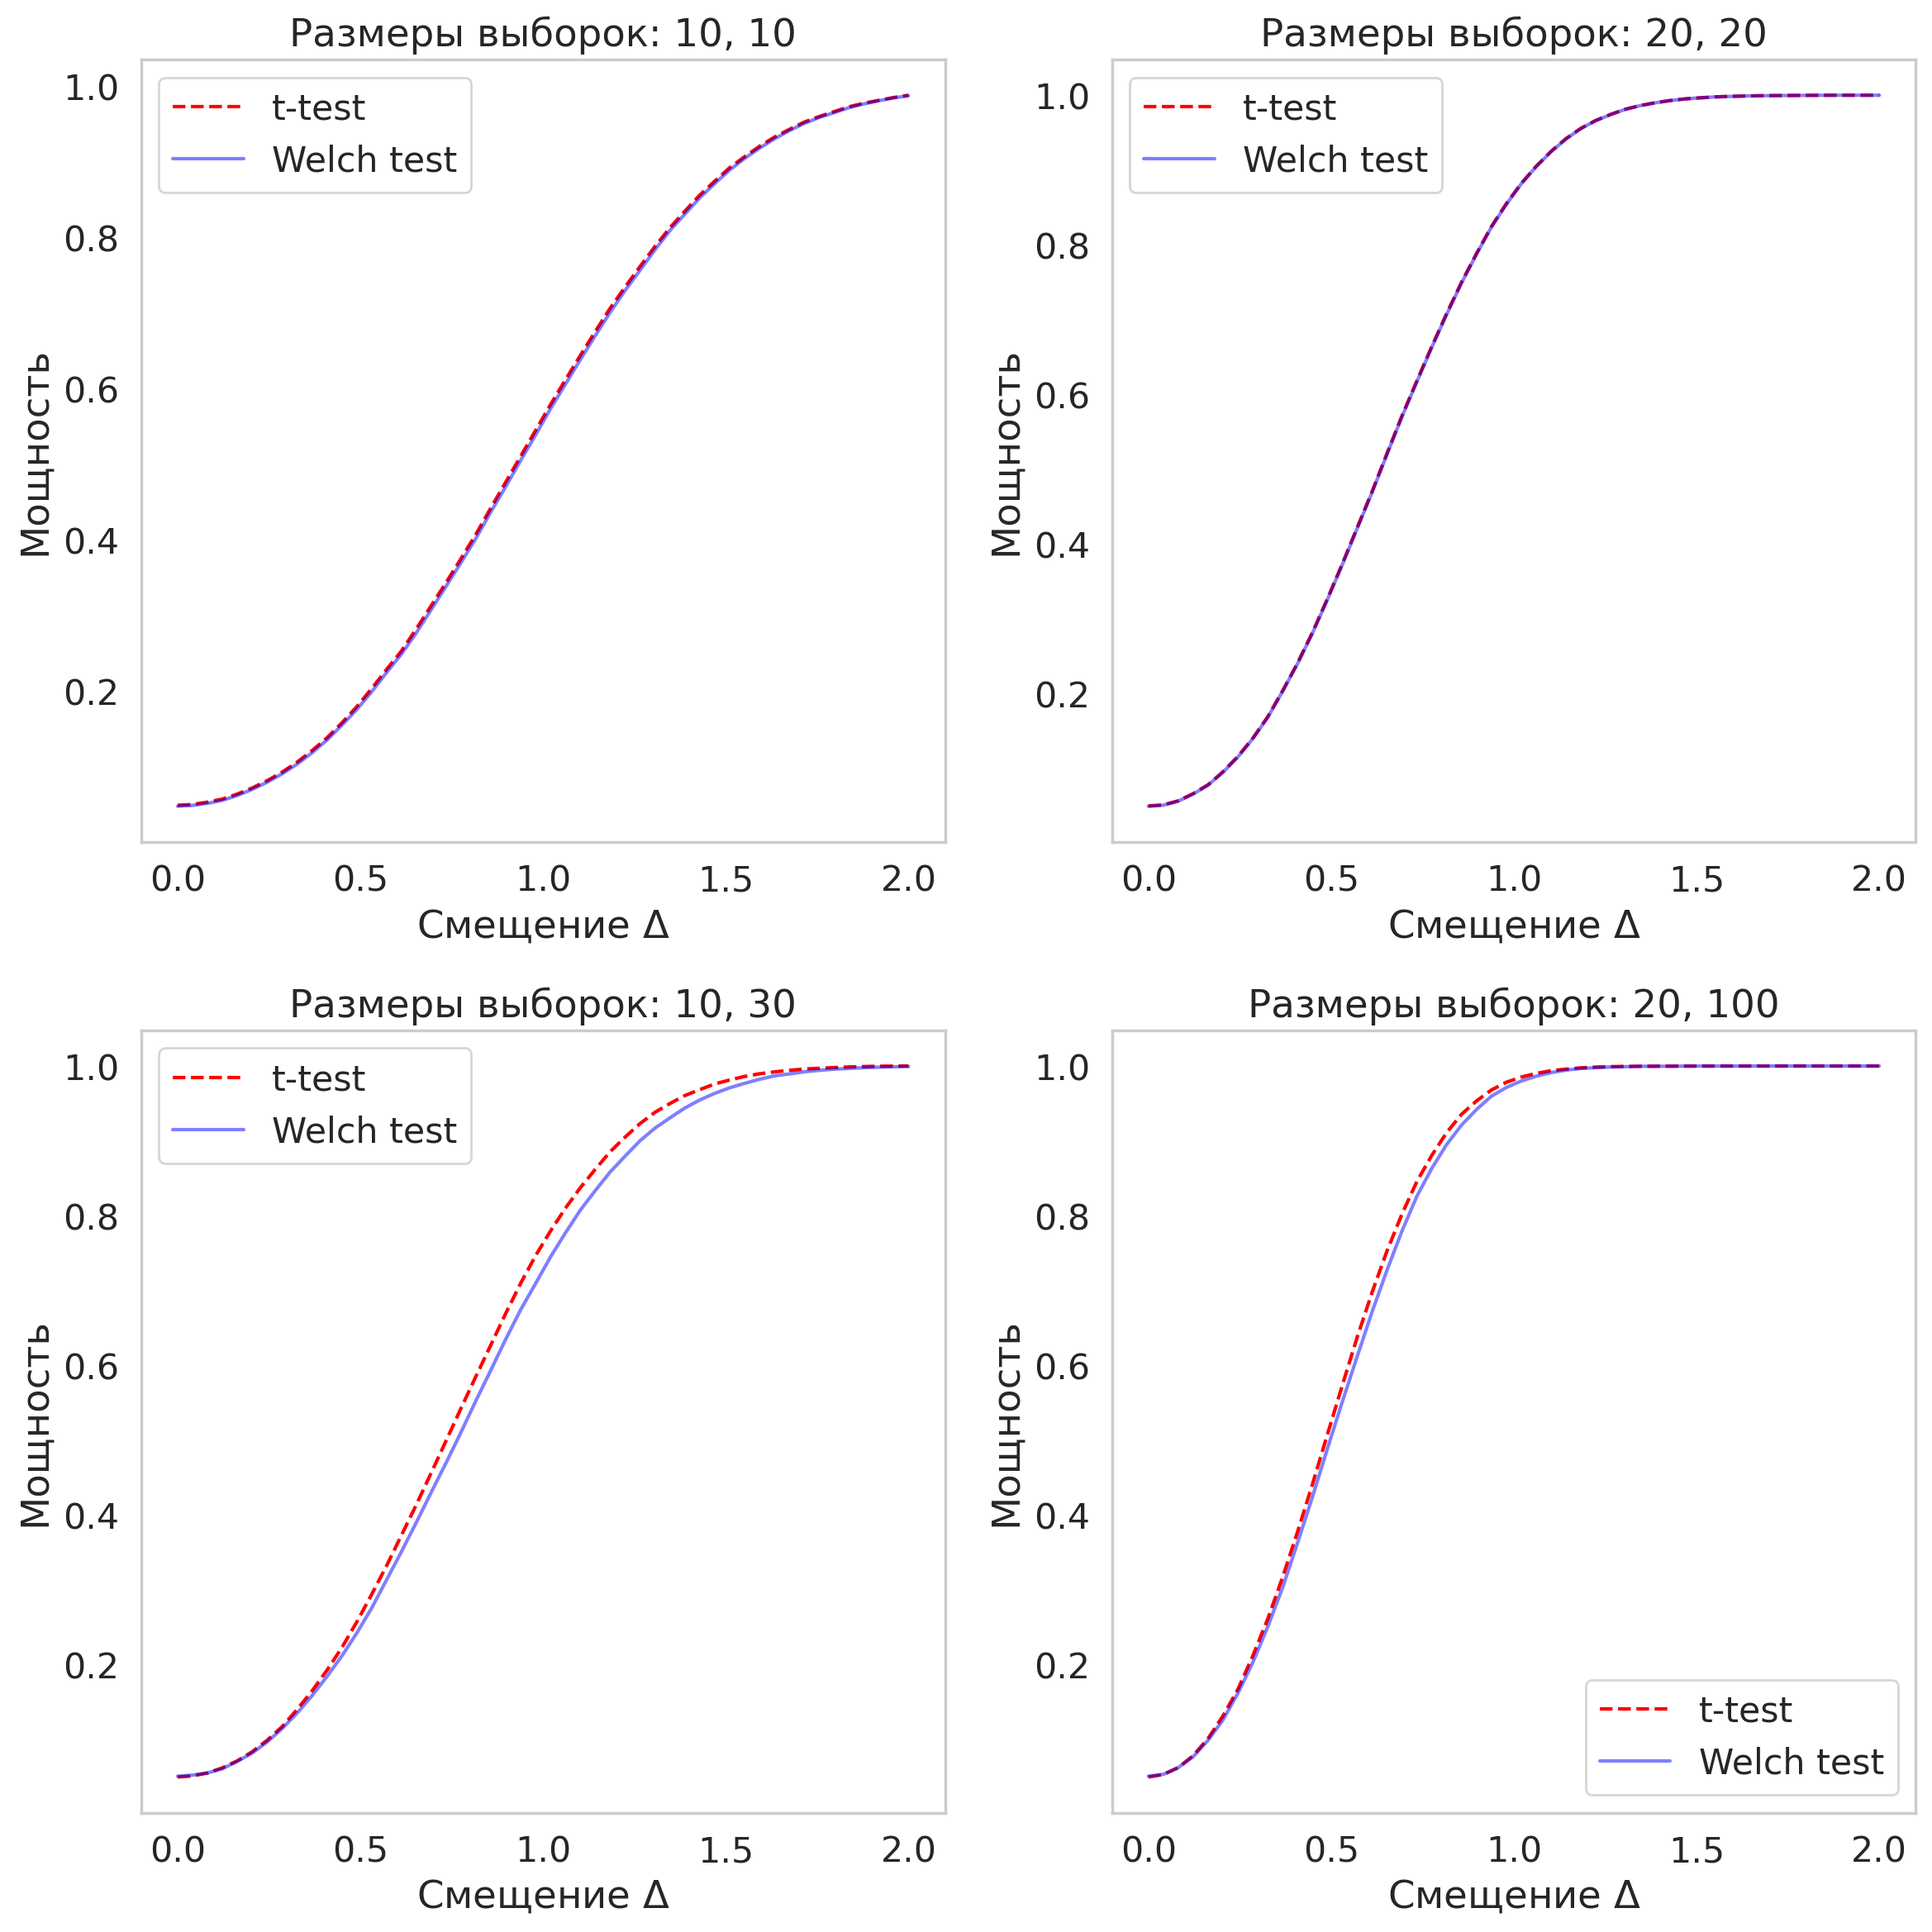

In [215]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))        

for i in range(len(sample_sizes)):
    row, col = i // 2, i % 2
    ax[row, col].plot(delta_range, results_t[i], label='t-test', color='red', linestyle='--')
    ax[row, col].plot(delta_range, results_welch[i], label='Welch test', color='blue', alpha=0.5)
    ax[row, col].set_title(f'Размеры выборок: {sample_sizes[i][0]}, {sample_sizes[i][1]}')
    ax[row, col].set_xlabel(r'Смещение $\Delta$')
    ax[row, col].set_ylabel('Мощность')
    ax[row, col].legend()
    ax[row, col].grid()

plt.tight_layout()
plt.show()

Как видим, тест Стьюдента на альтернативе лучше наблюдает изменение: его мощность немного, но больше.  
Отсюда можно сделать **вывод**:  
Критерий Уэлча хорош, поскольку не требует дополнительного условия на равенство дисперсий у выборок, и при неравенстве дисперсий не теряет значимости. Тем не менее, если дисперсии всё-таки равны, то наблюдается меньшая мощность, чем у обычного критерия Стьюдента. Так что при исследовании двух выборок на равенство мат. ожиданий, можно действовать так: если нам известно, что дисперсии одинаковые, то использовать критерий Стьюдента. Если же не равны, то предпочтительнее использовать критерий Уэлча. Если есть только предположение, что равны, то можно использовать критерий Стьюдента, но тогда возможно отклонение уровня значимости, но безопаснее использовать критерий Уэлча, так как он более устойчивый при несовпадении дисперсий.

4. *Это бонусный пункт*.

Как мы поняли ранее, для распределений, отличных от нормального, распределение pvalue при равенстве средних может быть далёким от равномерного. Можно, конечно, сдвинуть пороговое значение при проверки критерия, чтобы подправить вероятность ошибки I рода, но будет ли такой критерий достаточно мощным? Не стоит ли рассмотреть какую-нибудь другой критерий? В этом пункте мы рассмотрим такой, он называется *критерием отношения правдоподобий* (или сокращённо КОП).

Рассмотрим выборку $X_1, \ldots, X_n$, которая пришла из распределения $\mathsf{P}_{\theta}$ с совместной плотностью $\rho_{\theta}(\mathbf x)$, параметризованного неким $\theta \in \Theta \subset{R^k}$. Поставим на проверку гипотезу $H_0\colon \theta \in \Theta_0$, где $\Theta_0 \subset \Theta$ --- поверхность размерности $l$ (простой пример такой гипотезы -- $H_0\colon \theta_1 = \ldots = \theta_{k-l} = 0$). КОП предлагает рассмотреть статистику
$$
LR(\mathbf X) = \frac{\sup_{\theta \in \Theta} \rho_{\theta}(\mathbf X)}{\sup_{\theta \in \Theta_0} \rho_{\theta}(\mathbf X)}.
$$

Своего рода она показывает, насколько общее правдоподобие выше частного, и если разрыв между ними очень большой, то критерий будет отвергать гипотезу $H_0$. Оказывается, что в некоторых условиях регулярности справедлив следующий асимптотический результат, называемый теоремой Уилкса:
$$
2 \ln LR(\mathbf X) \stackrel{d}{\to} \chi^2_{k-l}.
$$

Таким образом, критерий вида $\{\mathbf x\colon 2 \ln LR(\mathbf x) > \chi^2_{k-l,1-\alpha}\}$ будет иметь асимптотический уровень значимости $\alpha$. Применим его к проверке равенства средних, но для совсем другого семейства распределений, например, Коши.

Пусть $X_1, \ldots, X_n \sim \mathrm{Cauchy}(\mu_1, \sigma)$, $Y_1, \ldots, Y_m \sim \mathrm{Cauchy}(\mu_2, \sigma)$ --- две независимые выборки (для удобства возьмём $n=m=30$). Проверим гипотезу $H_0\colon \mu_1 = \mu_2$. Просэмплируйте много выборок при верности нулевой гипотезы, промоделируйте распределение статистики t-критерия и подберите такой порог $c$, чтобы критерий $\{(\mathbf x, \mathbf y)\colon T(\mathbf x, \mathbf y) > c\}$ имел уровень значимости примерно $\alpha$.

In [ ]:
#Ваш код здесь

Научитесь численно решать задачу оптимизации, которая возникает при нахождении статистики $LR(\mathbf X)$, и реализуйте её. Для всех пар выборок посчитайте эту статистику и визуализируйте распределение pvalue. Похоже ли оно на равномерное? Контролируется ли ошибка I рода у критерия уровня значимости 0.05?

In [ ]:
#Ваш код здесь

Сравним два полученных критерия по мощности. Для этого, аналогично пункту 3, оцените вероятность отвержения нулевой гипотезы для разных сдвигов $\Delta$. Учтите, что эта процедура может длиться ОЧЕНЬ долго. Заранее подумайте, как оптимизировать вычисления, не считать что-либо по нескольку раз и т.д.

In [ ]:
#Ваш код здесь

Сделайте вывод.

**Вывод:**

In [ ]:
#Ваш код здесь